# Prepare

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter


In [2]:
# Load data
df = pd.DataFrame()
ids = {}
gestures = {}
sample_data_path = 'JonGestureLogs'
my_data_path = 'QianGestureLogs'
ctime_label = ' CurrentTimeMs'
xyz = [' X', ' Y', ' Z']

def smooth(y, box_pts):
    return savgol_filter(y, 15, box_pts)

def loadData(path):
    global df, ids
    for (root, dirs, files) in os.walk(path):
        for file in files:
            t = file.split('_')
            if (len(t) < 3):
                continue
            fpath = os.path.join(root,file)
            tdf = pd.read_csv(fpath, header = 0)
            tdf['mGesture'] = t[0]
            tdf['mSensor'] = t[1]
            str_id = t[2][:-4]
            mId = path[0] + str_id
            if (path[0] == 'Q'):
                for colname in xyz:
                    tdf[colname] = smooth(tdf[colname], 3)
            tdf['mId'] = mId
            tdf['mDataset'] = path[0]
            tdf['mTime'] = tdf[ctime_label] - int(str_id)
            df = df.append(tdf)
            gestures[mId] = t[0]
            if (t[0] not in ids):
                ids[t[0]] = [mId]
            elif (mId not in ids[t[0]]):
                ids[t[0]].append(mId)

loadData(sample_data_path)
loadData(my_data_path)
sensors = df['mSensor'].unique()


/usr/local/lib/python3.6/site-packages/scipy/signal/_savitzky_golay.py:135: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  coeffs, _, _, _ = lstsq(A, y)


# Visualization

### raw signal

In [3]:
def line(sensor, dataset):
    fig, axs = plt.subplots(len(ids), 3, figsize = (16, 40))
    plt.subplots_adjust(hspace = 1)
    fig.suptitle(dataset + ':' + sensor)
    for row in range(len(ids)):
        gesture = list(ids)[row]
        for col in range(len(xyz)):
            colname = xyz[col]
            for tid in range(len(ids[gesture])):
                mid = ids[gesture][tid]
                if (mid[0]!=dataset):
                    continue
                tdf = df.loc[(df['mId'] == mid) & (df['mSensor'] == sensor)]
                axs[row,col].plot('mTime', colname, data=tdf, label=mid)#[0]+str(tid)
                axs[row,col].legend()
                axs[row,col].set_title(gesture + colname)
#                 break

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Second argument ' X' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  


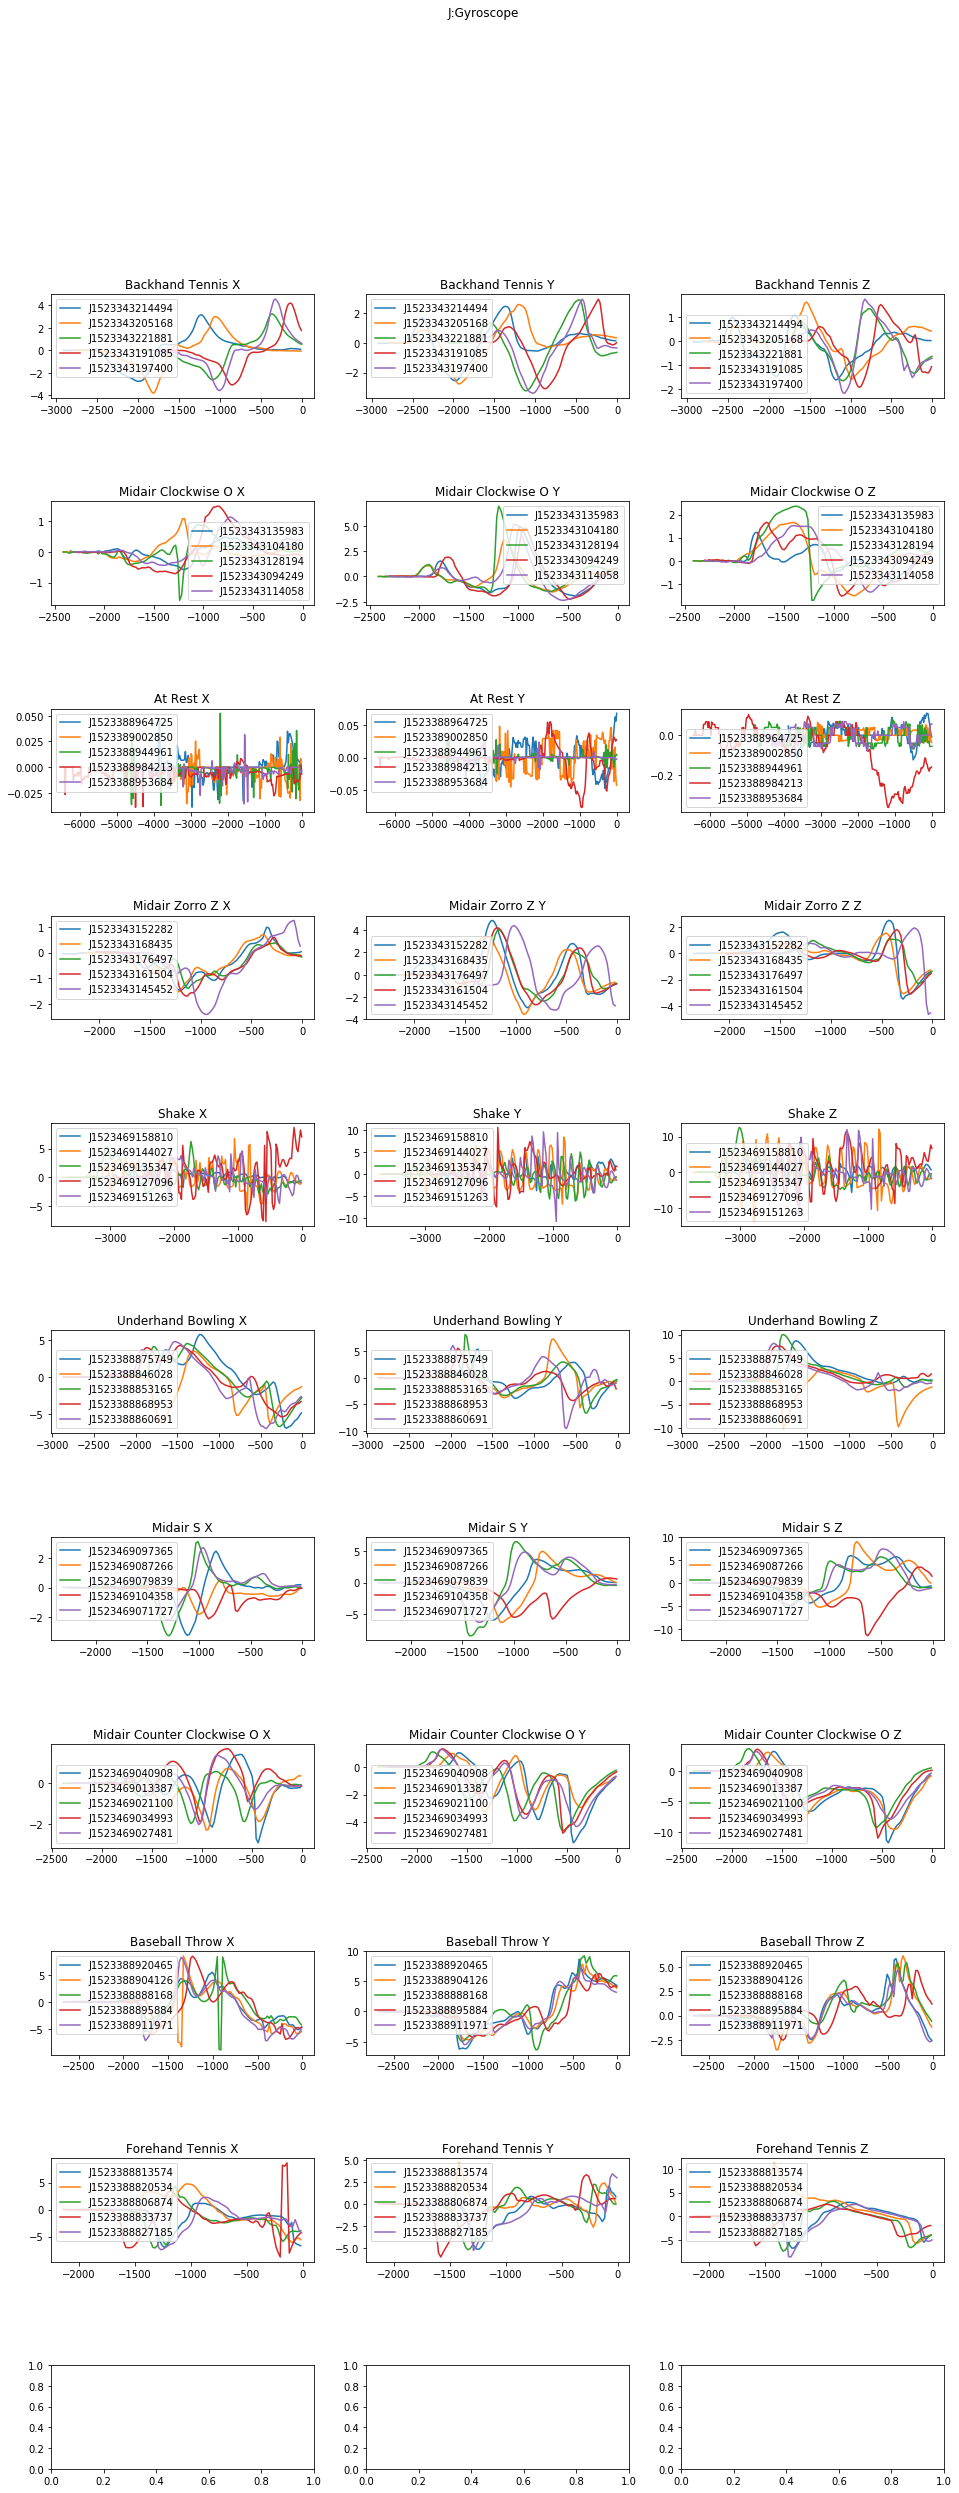

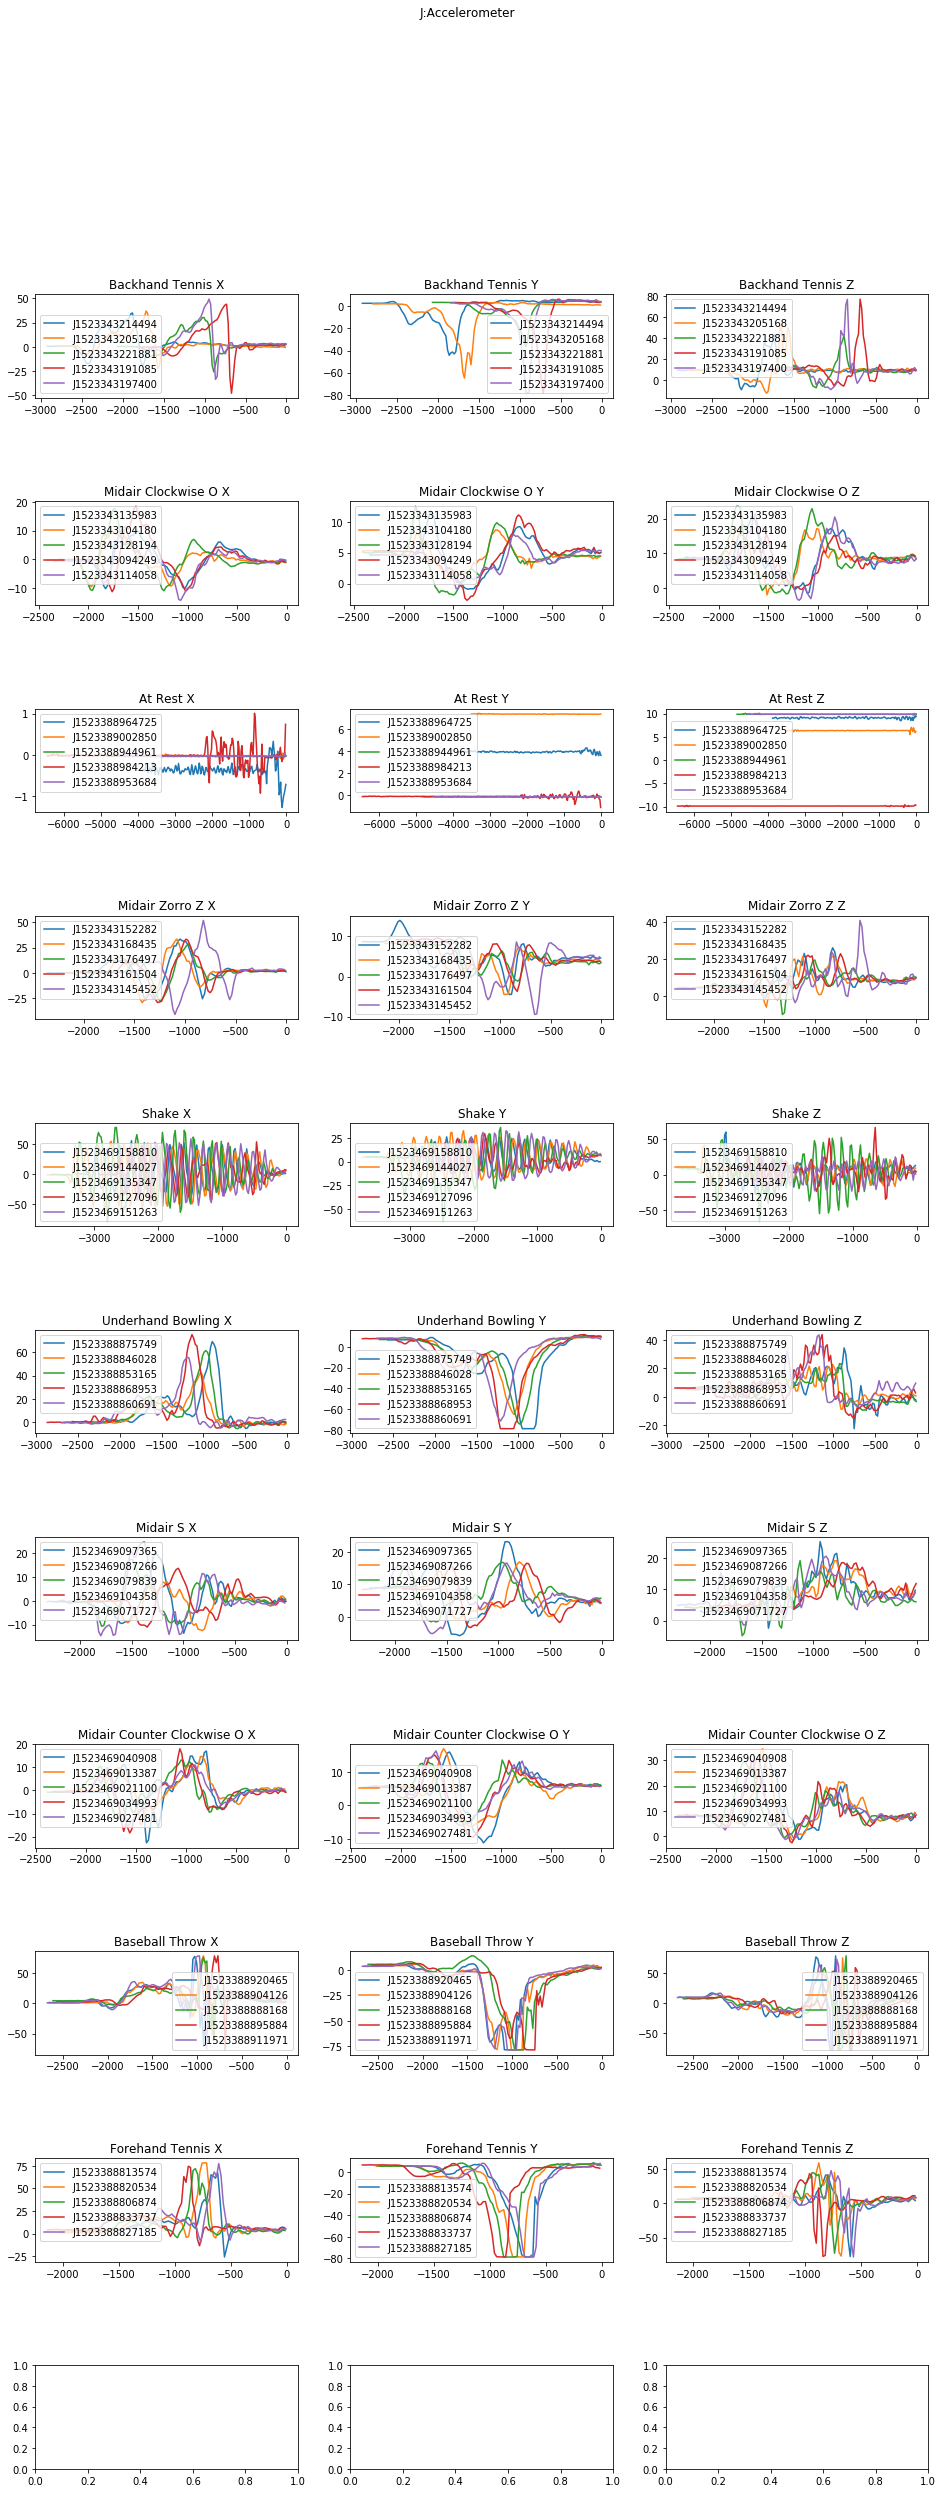

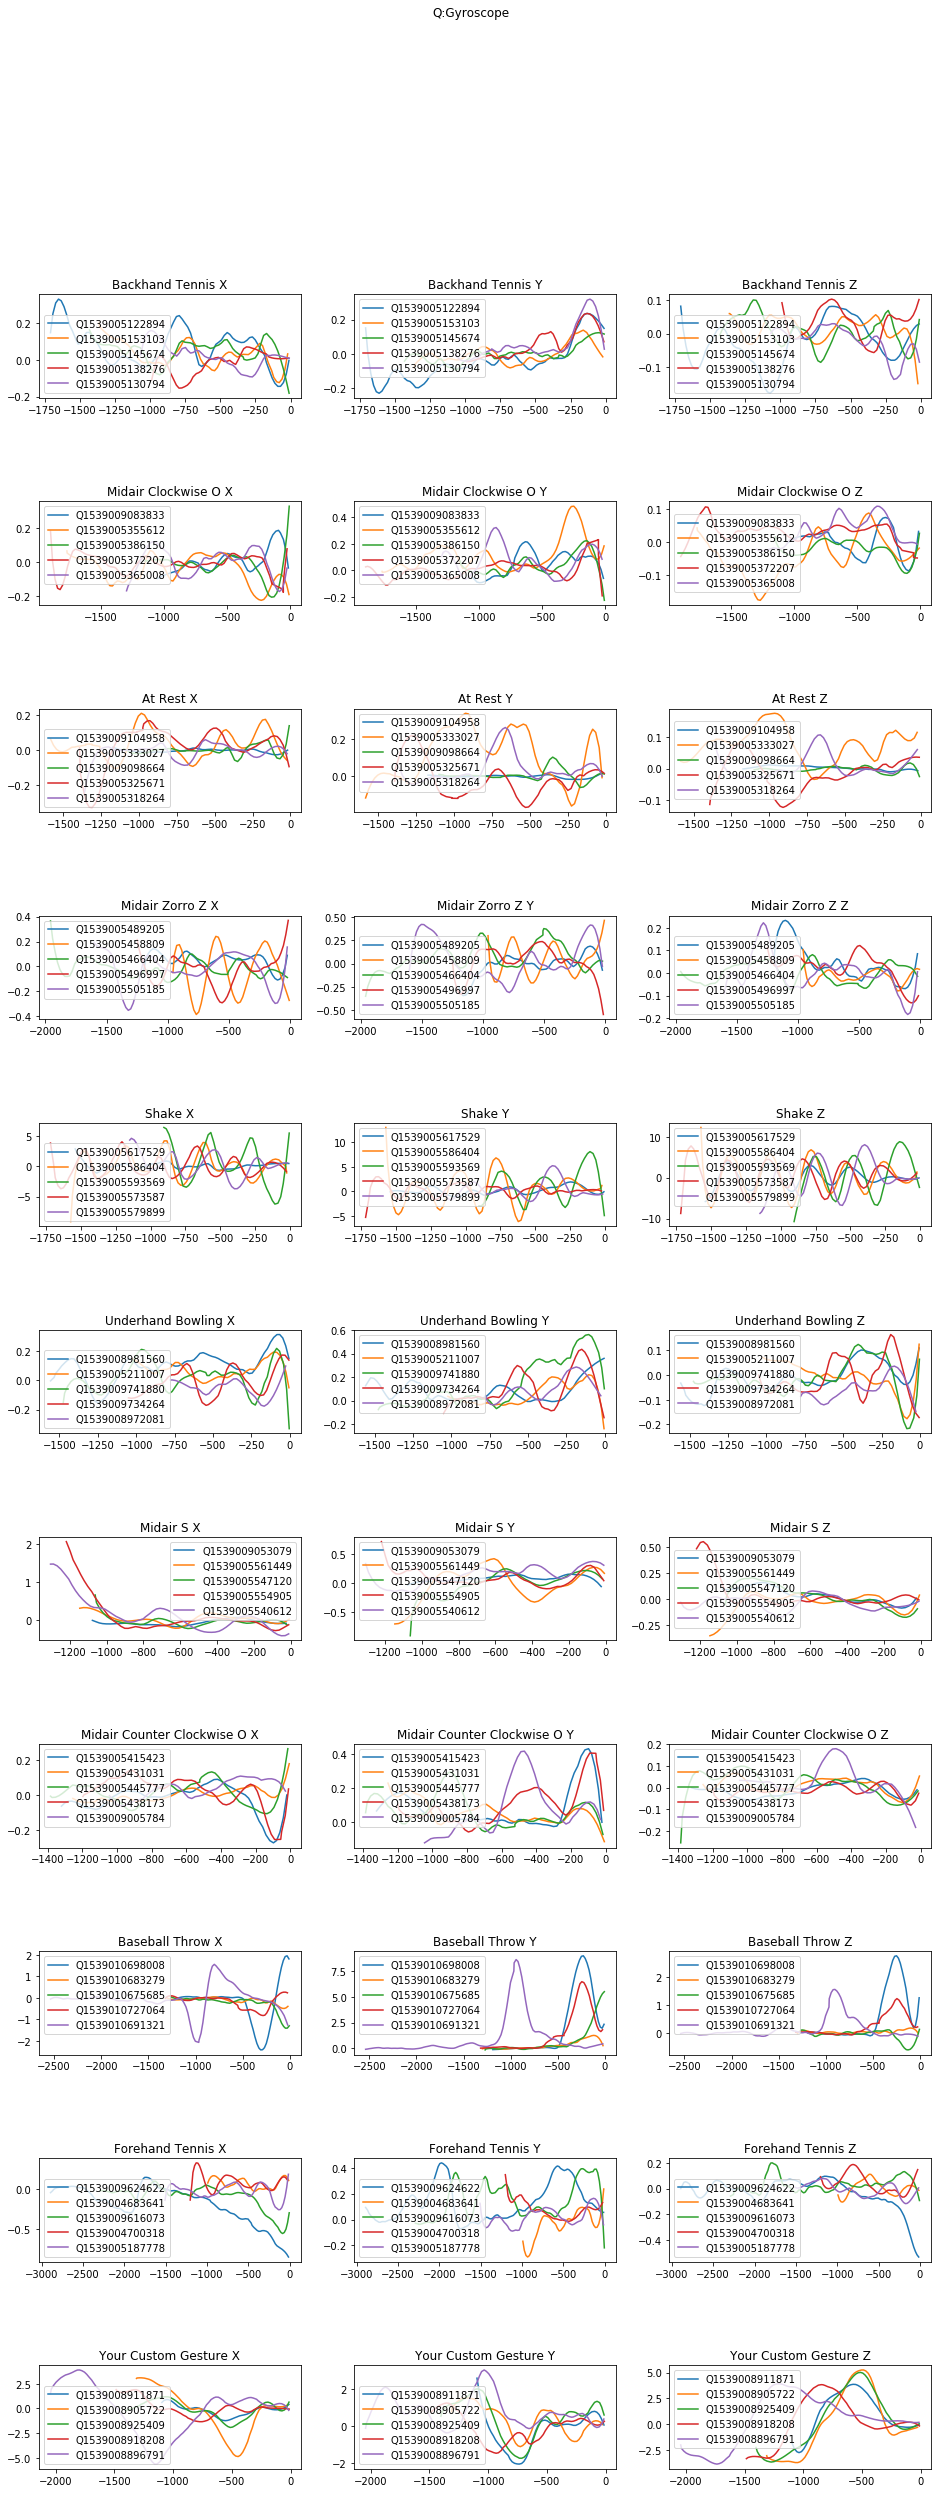

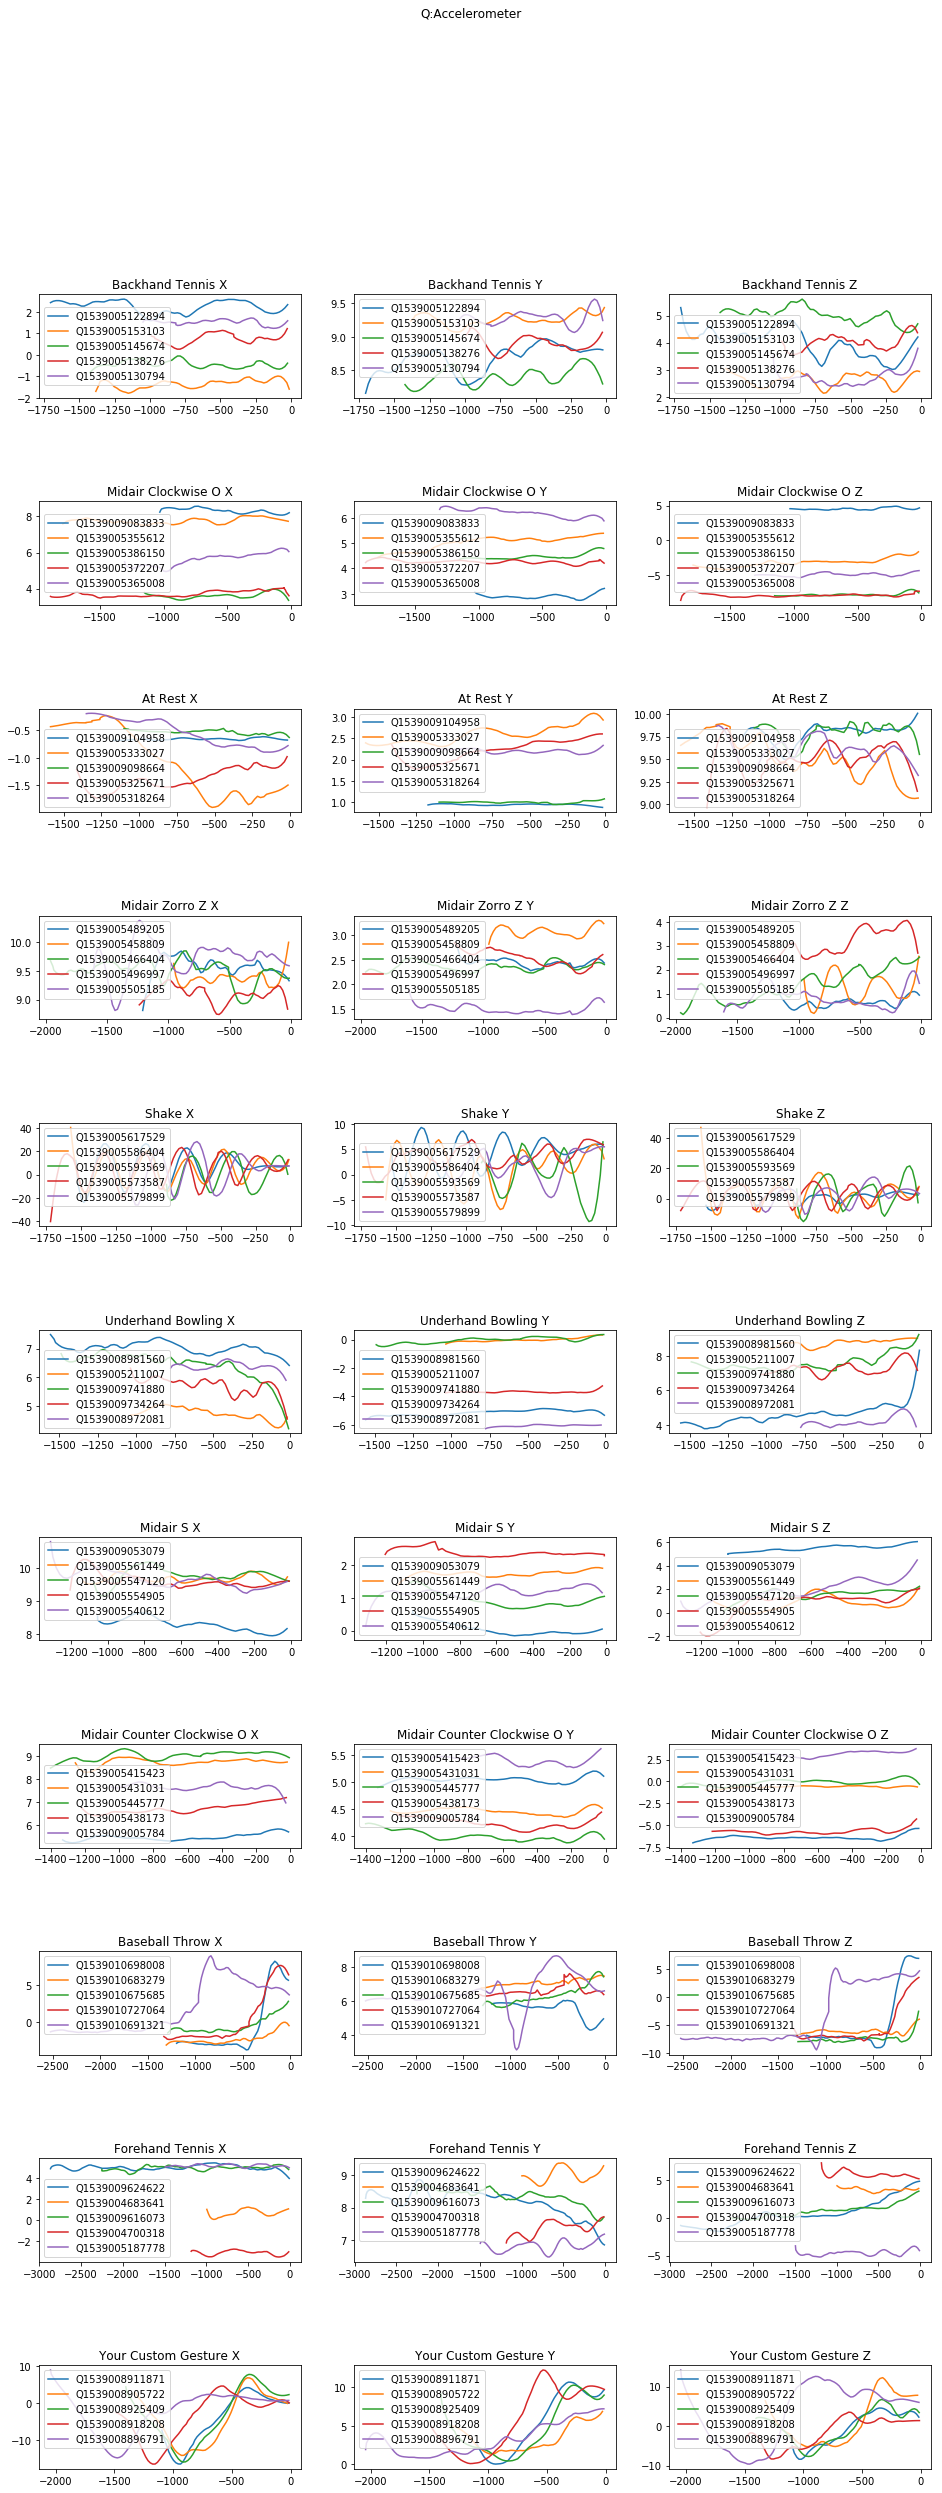

In [4]:
line(sensors[0], 'J')
line(sensors[1], 'J')
line(sensors[0], 'Q')
line(sensors[1], 'Q')

### frequency analysis

In [5]:
def spec(sensor, dataset, colname):
    fig, axs = plt.subplots(len(ids), 5, figsize = (15, 30))
    plt.subplots_adjust(hspace = 0.5)
    fig.suptitle(' '.join([dataset,sensor,colname]))
    for row in range(len(ids)):
        gesture = list(ids)[row]
        col = 0
        for mid in ids[gesture]:
            if (mid[0]!=dataset):
                continue
            tdf = df.loc[(df['mId'] == mid) & (df['mSensor'] == sensor)]
            axs[row,col].specgram(x = tdf[colname], NFFT = 16, noverlap = 8, Fs = 2)
            axs[row,col].set_title(gesture + ' ' + str(col))  
            col += 1    

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:7585: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


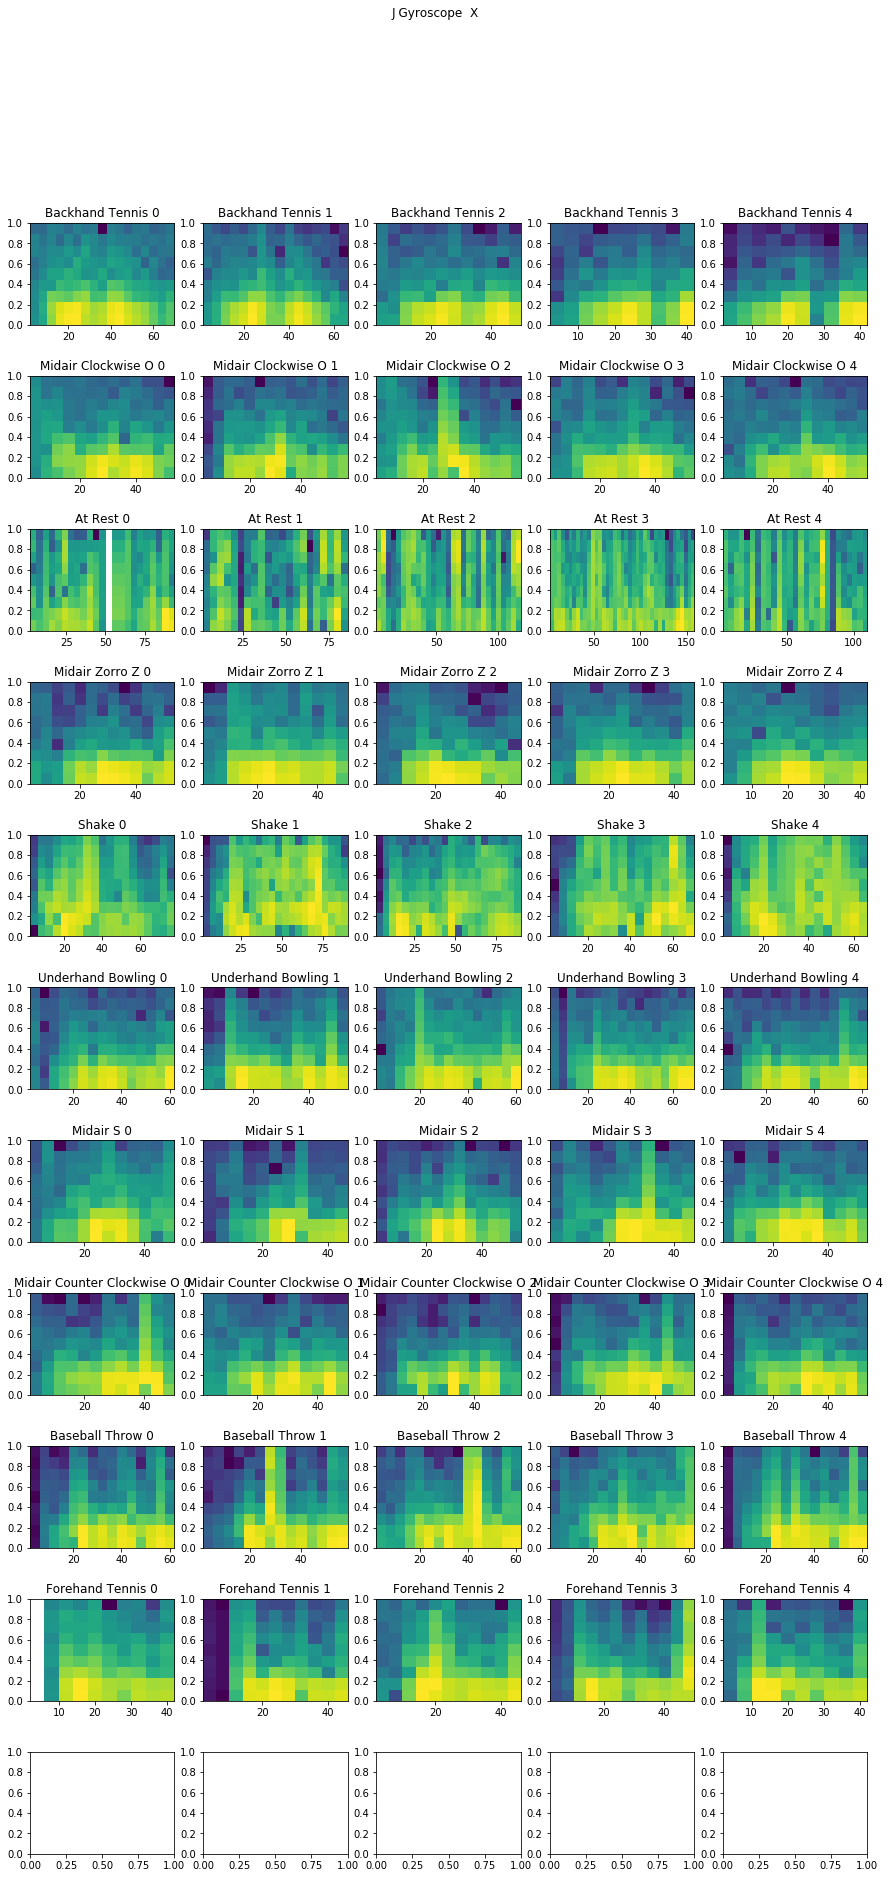

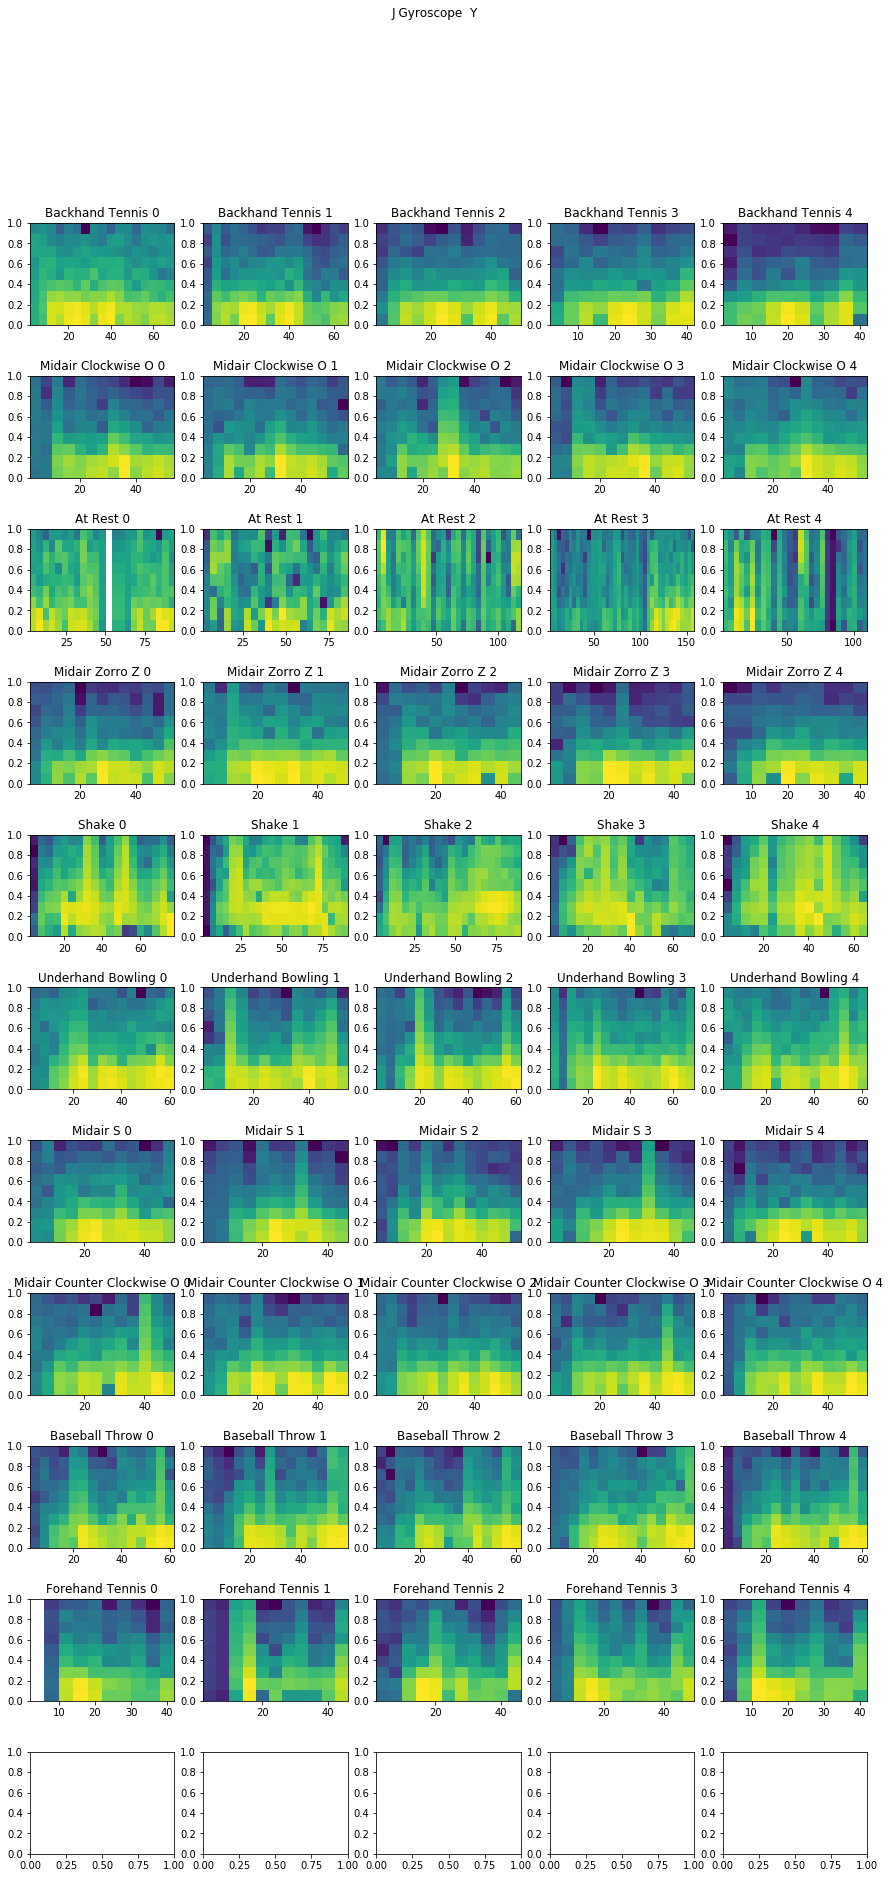

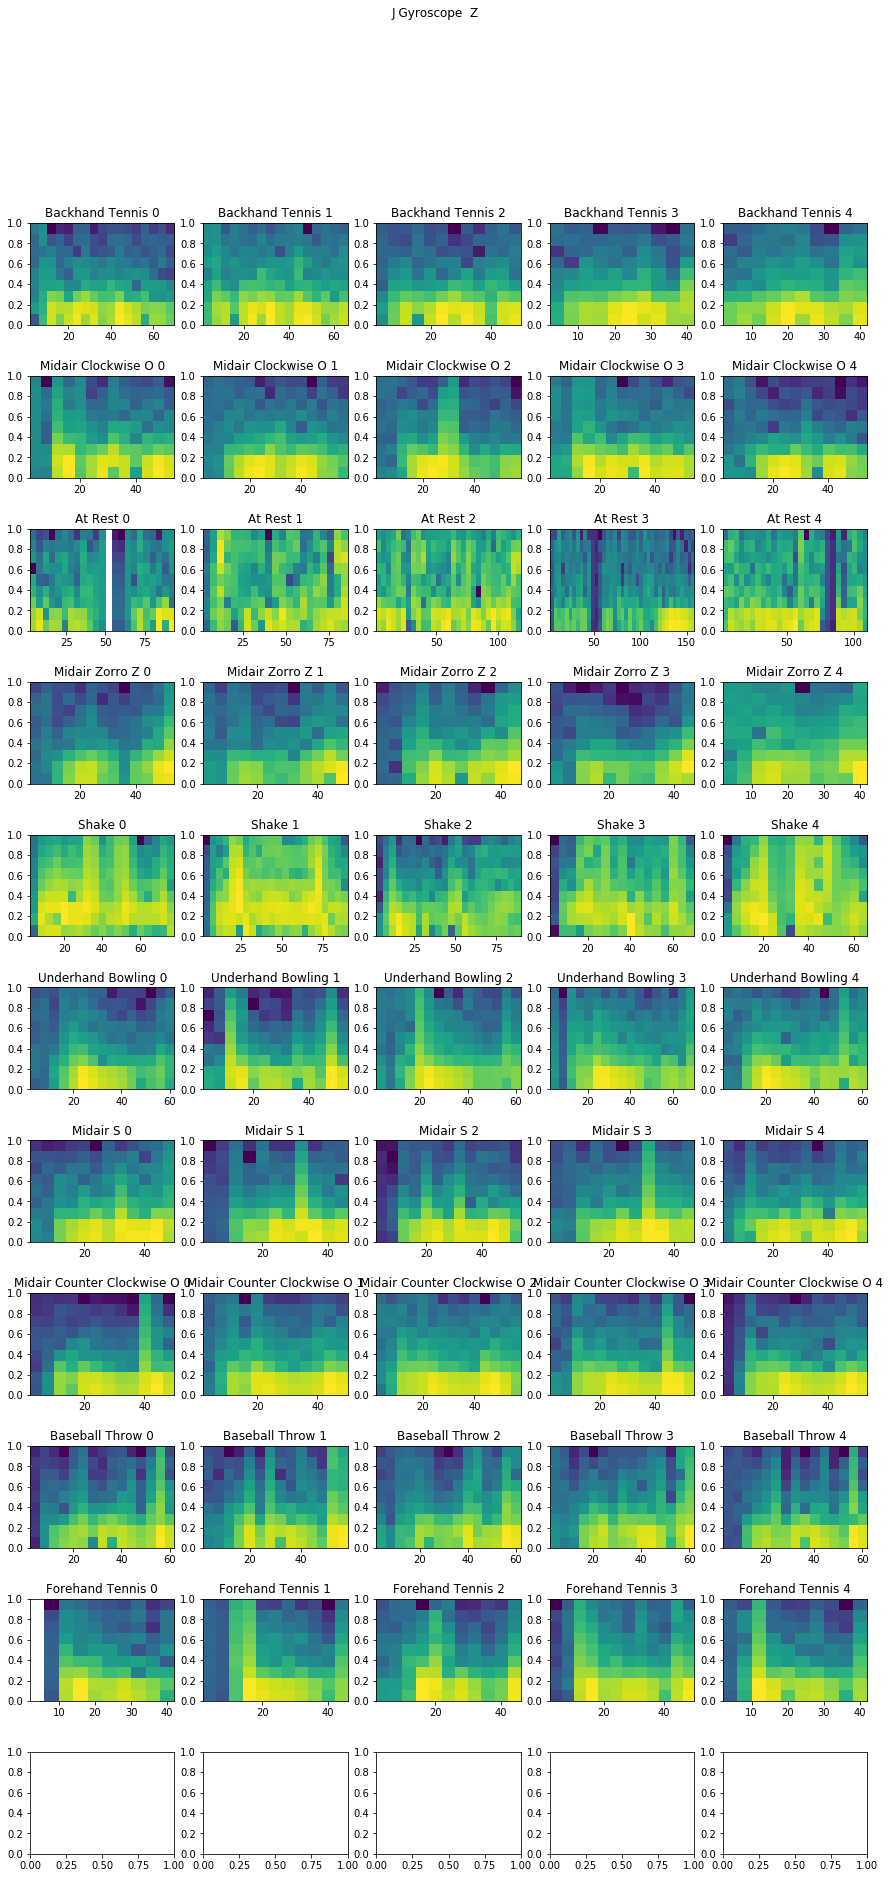

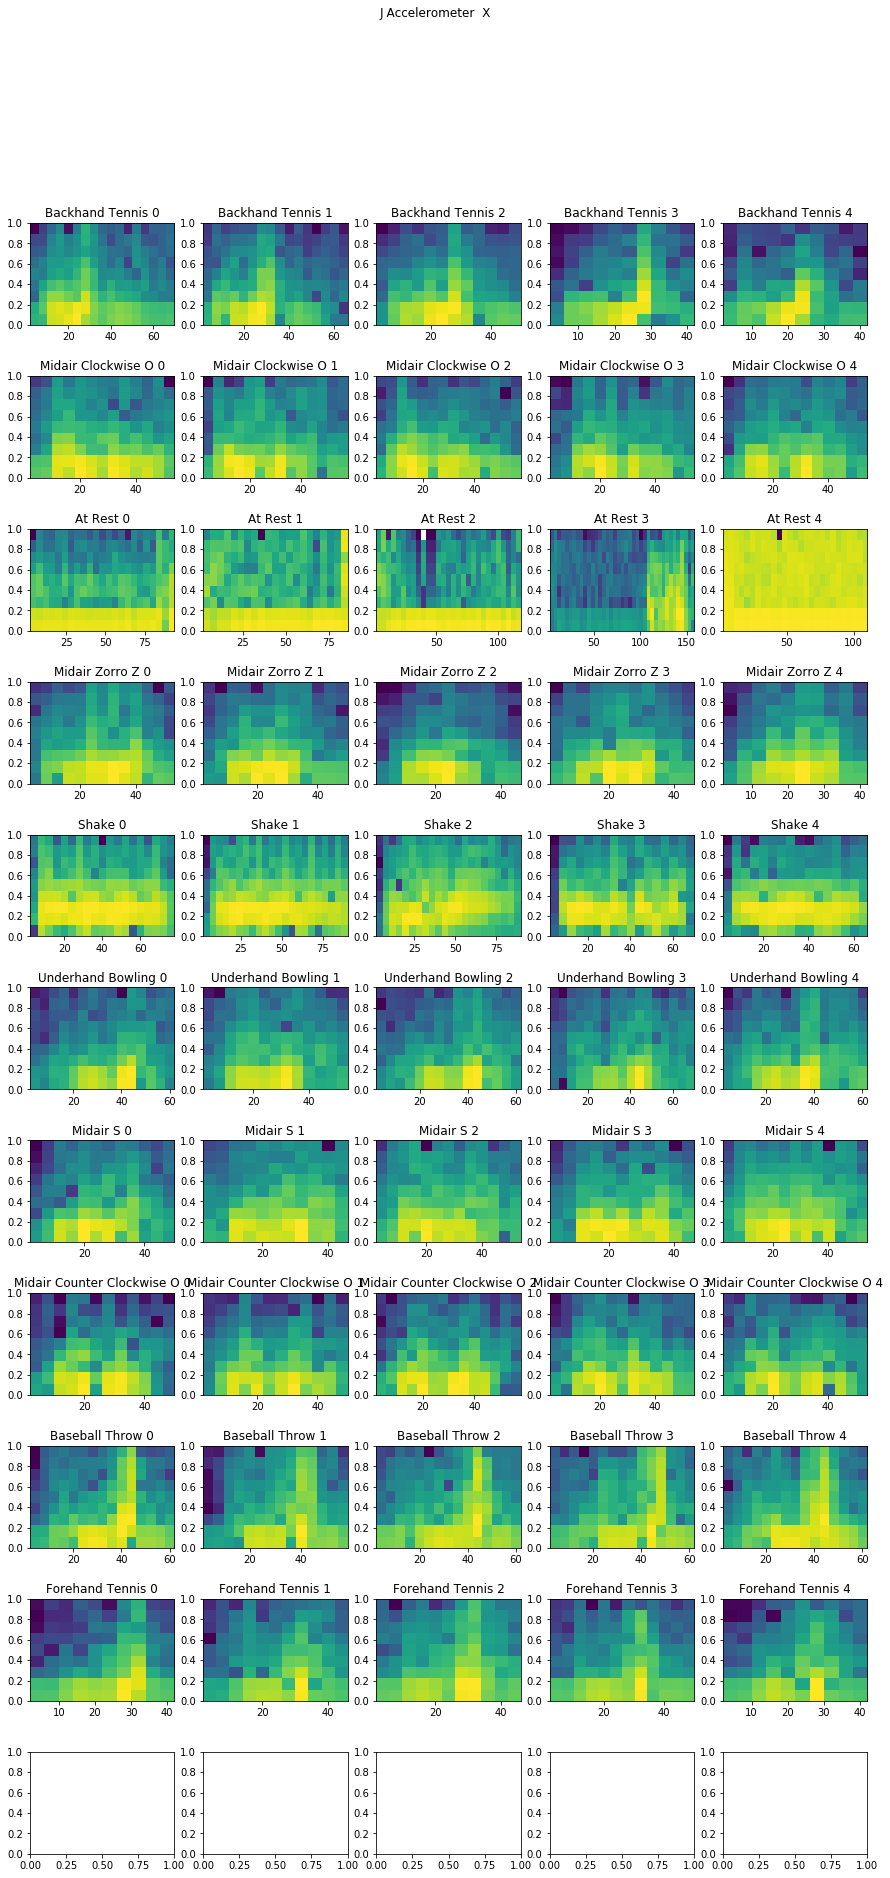

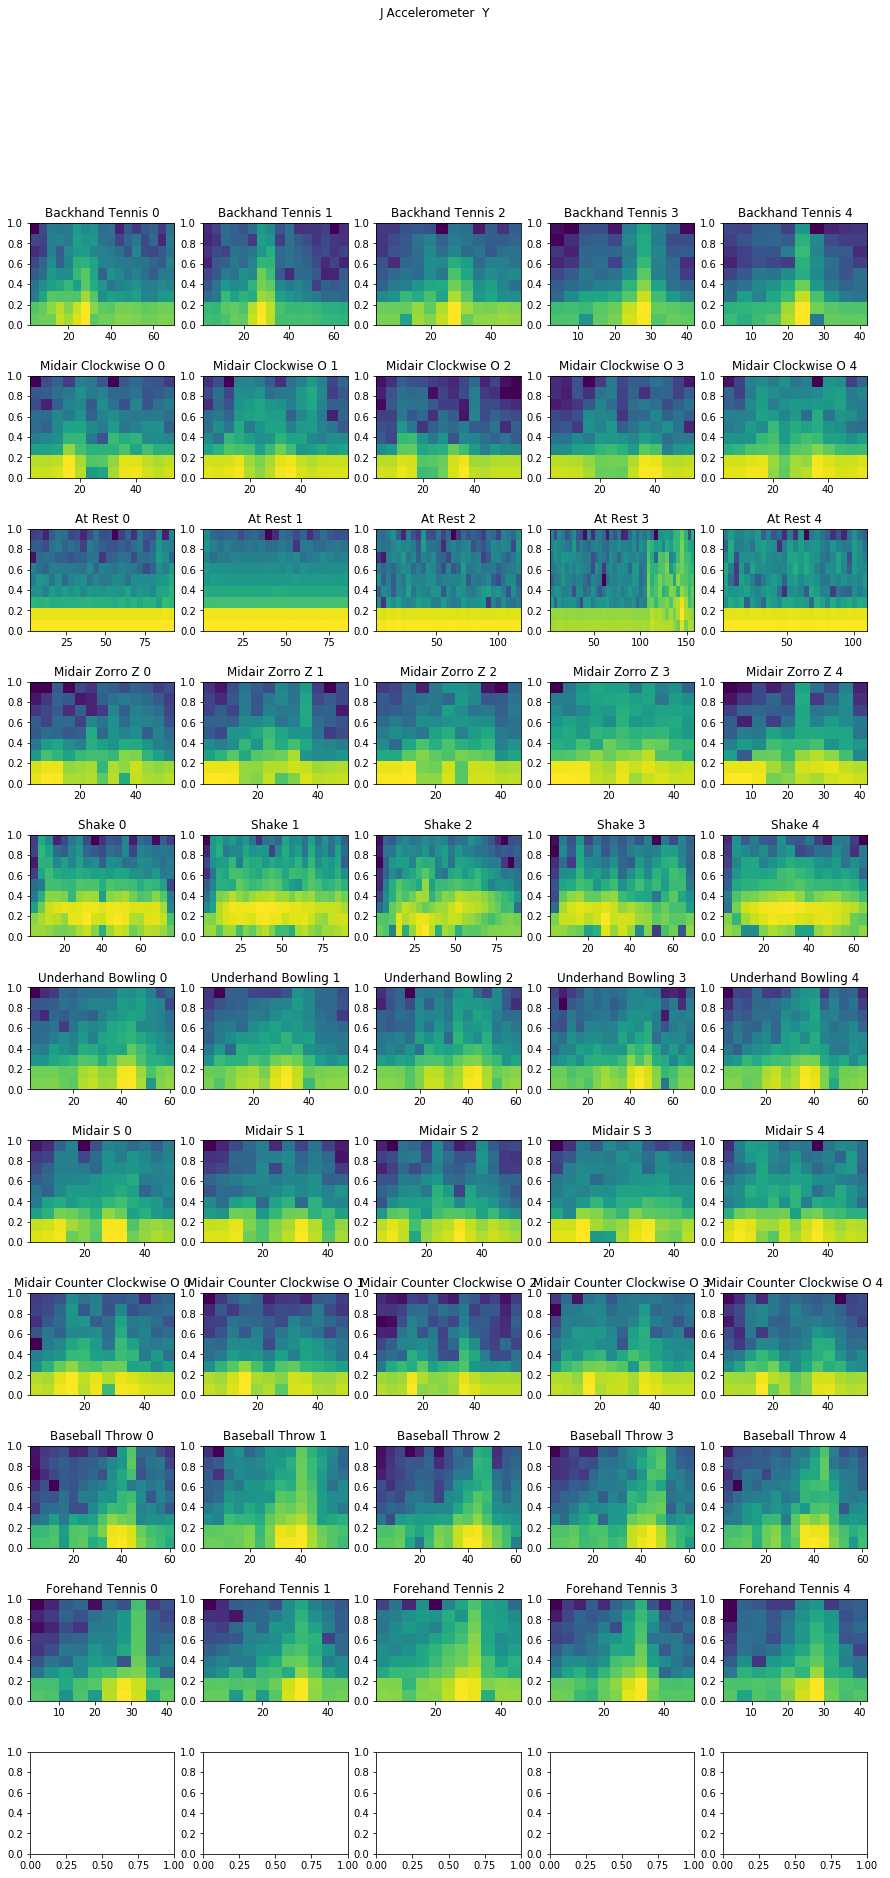

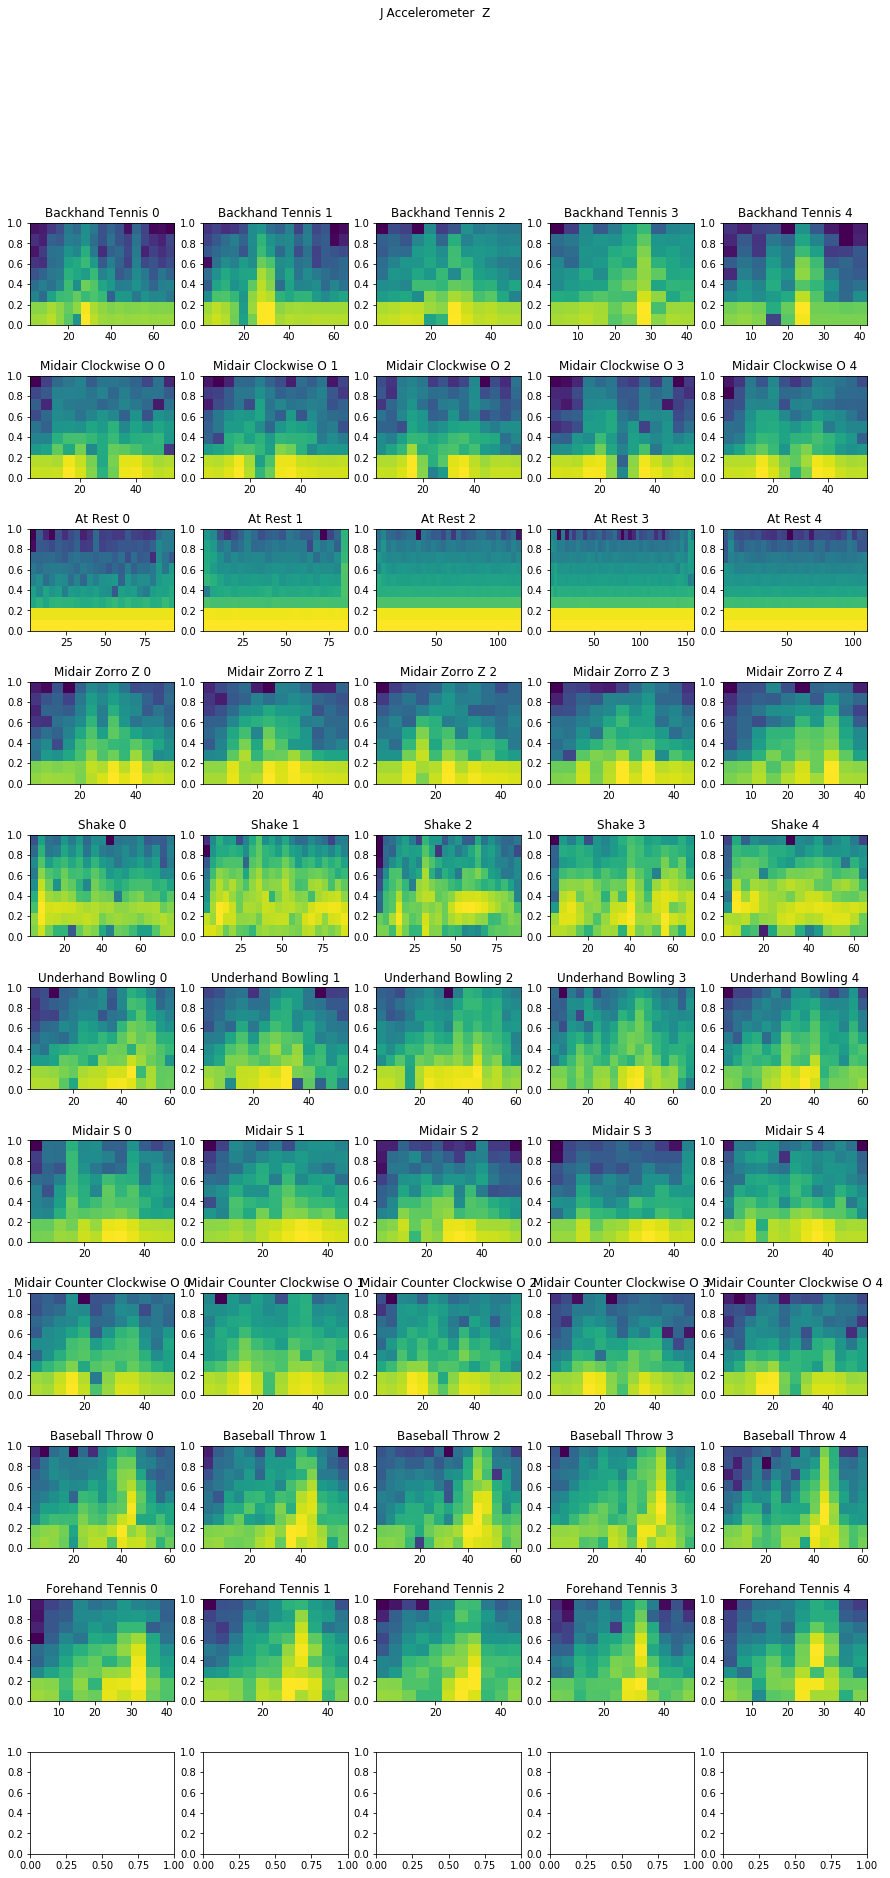

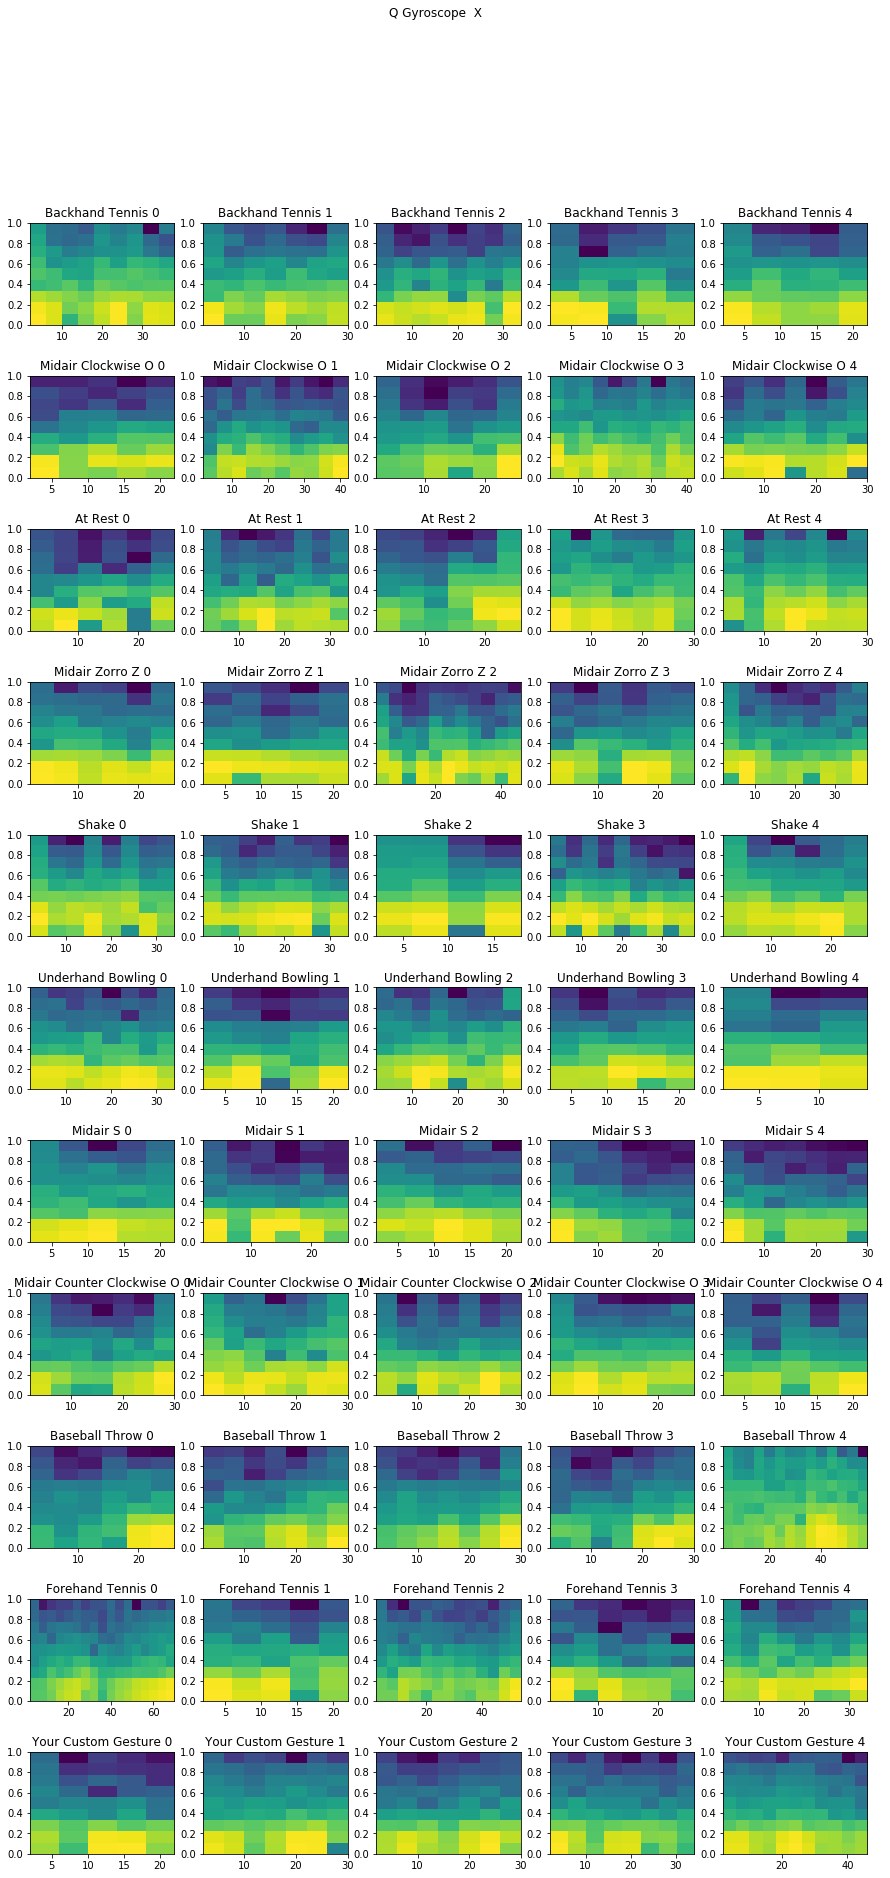

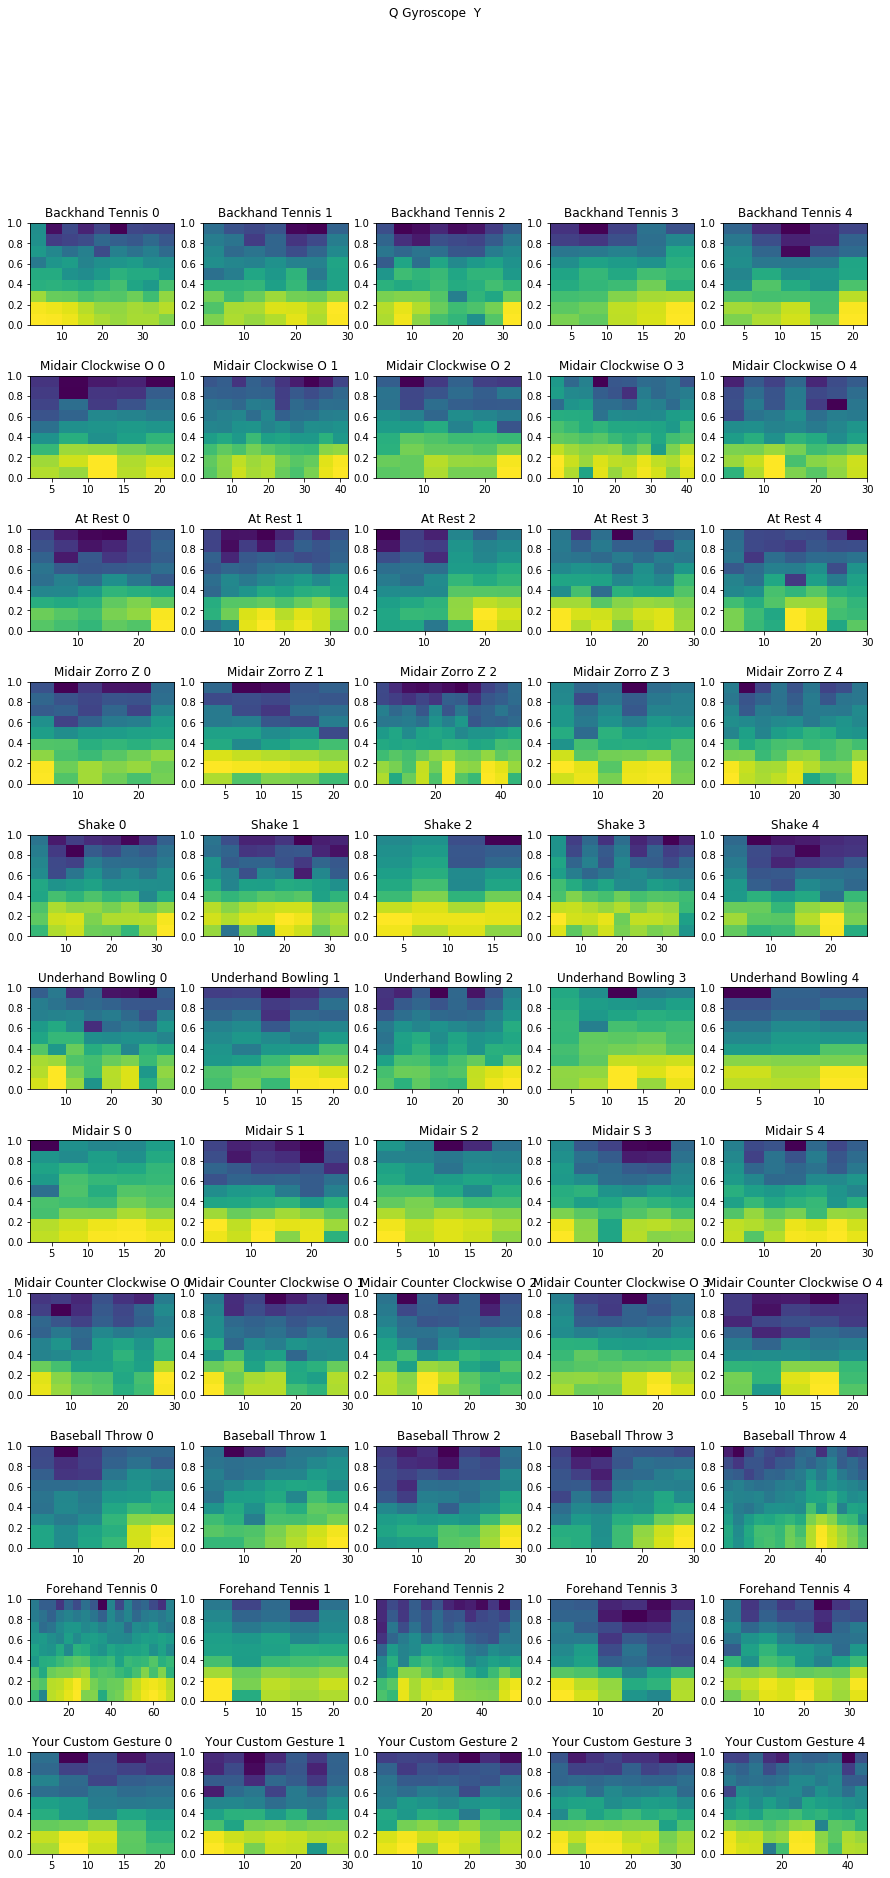

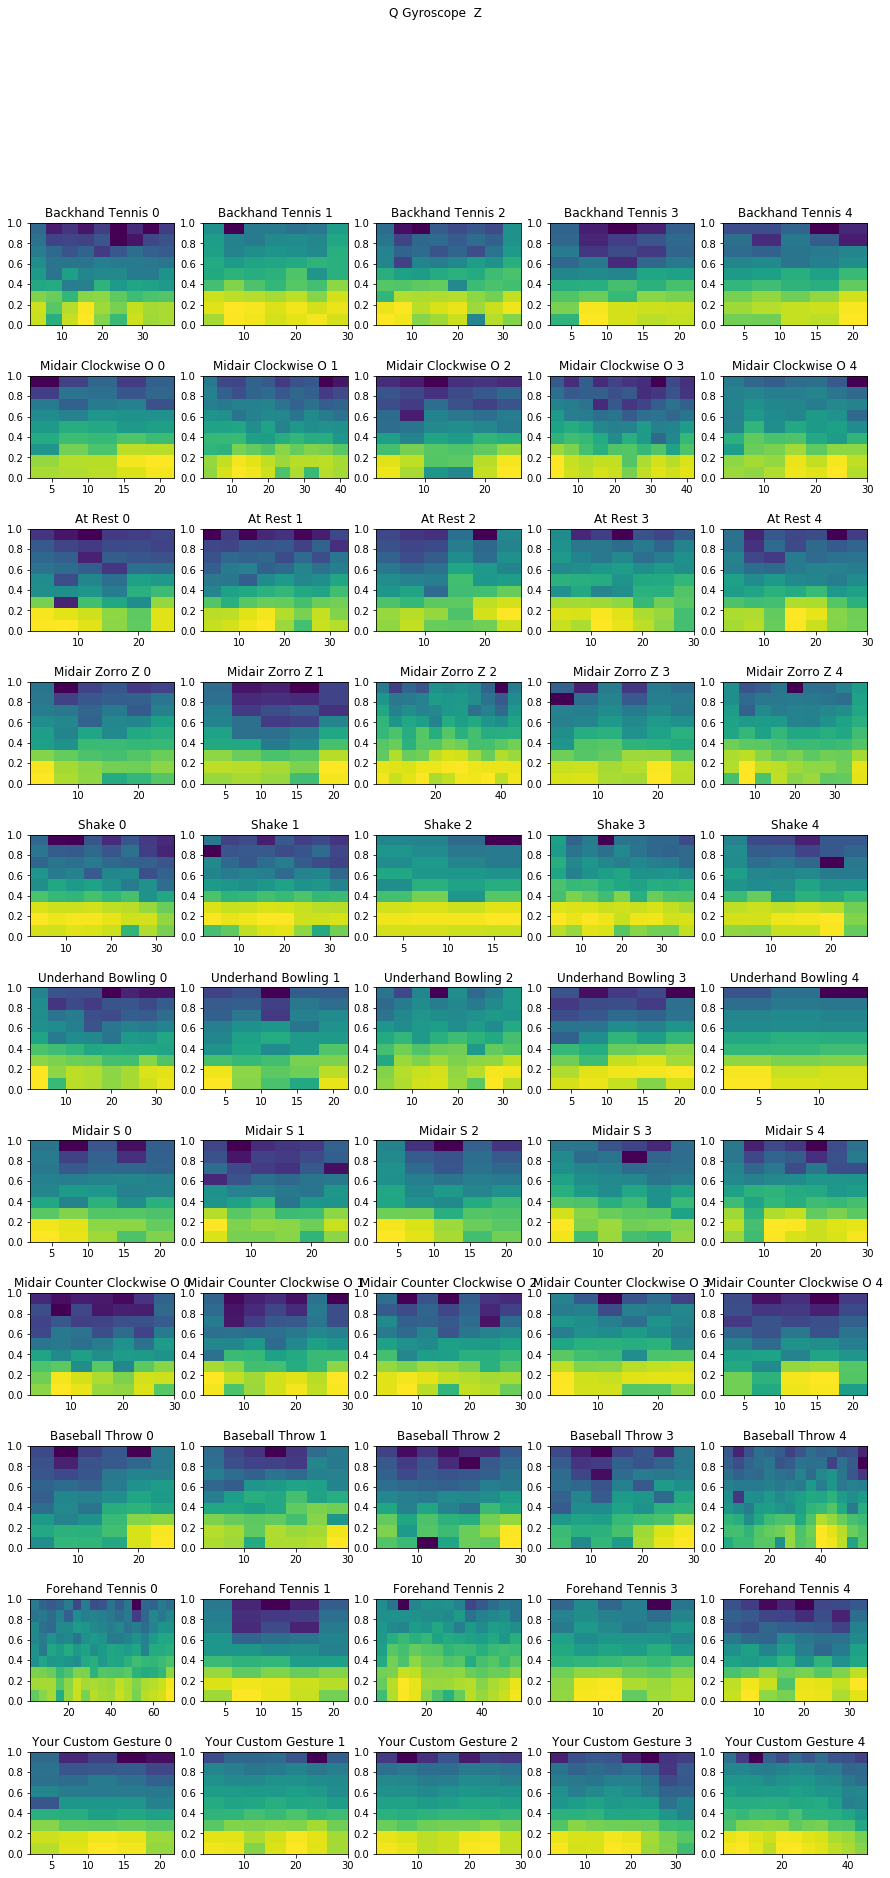

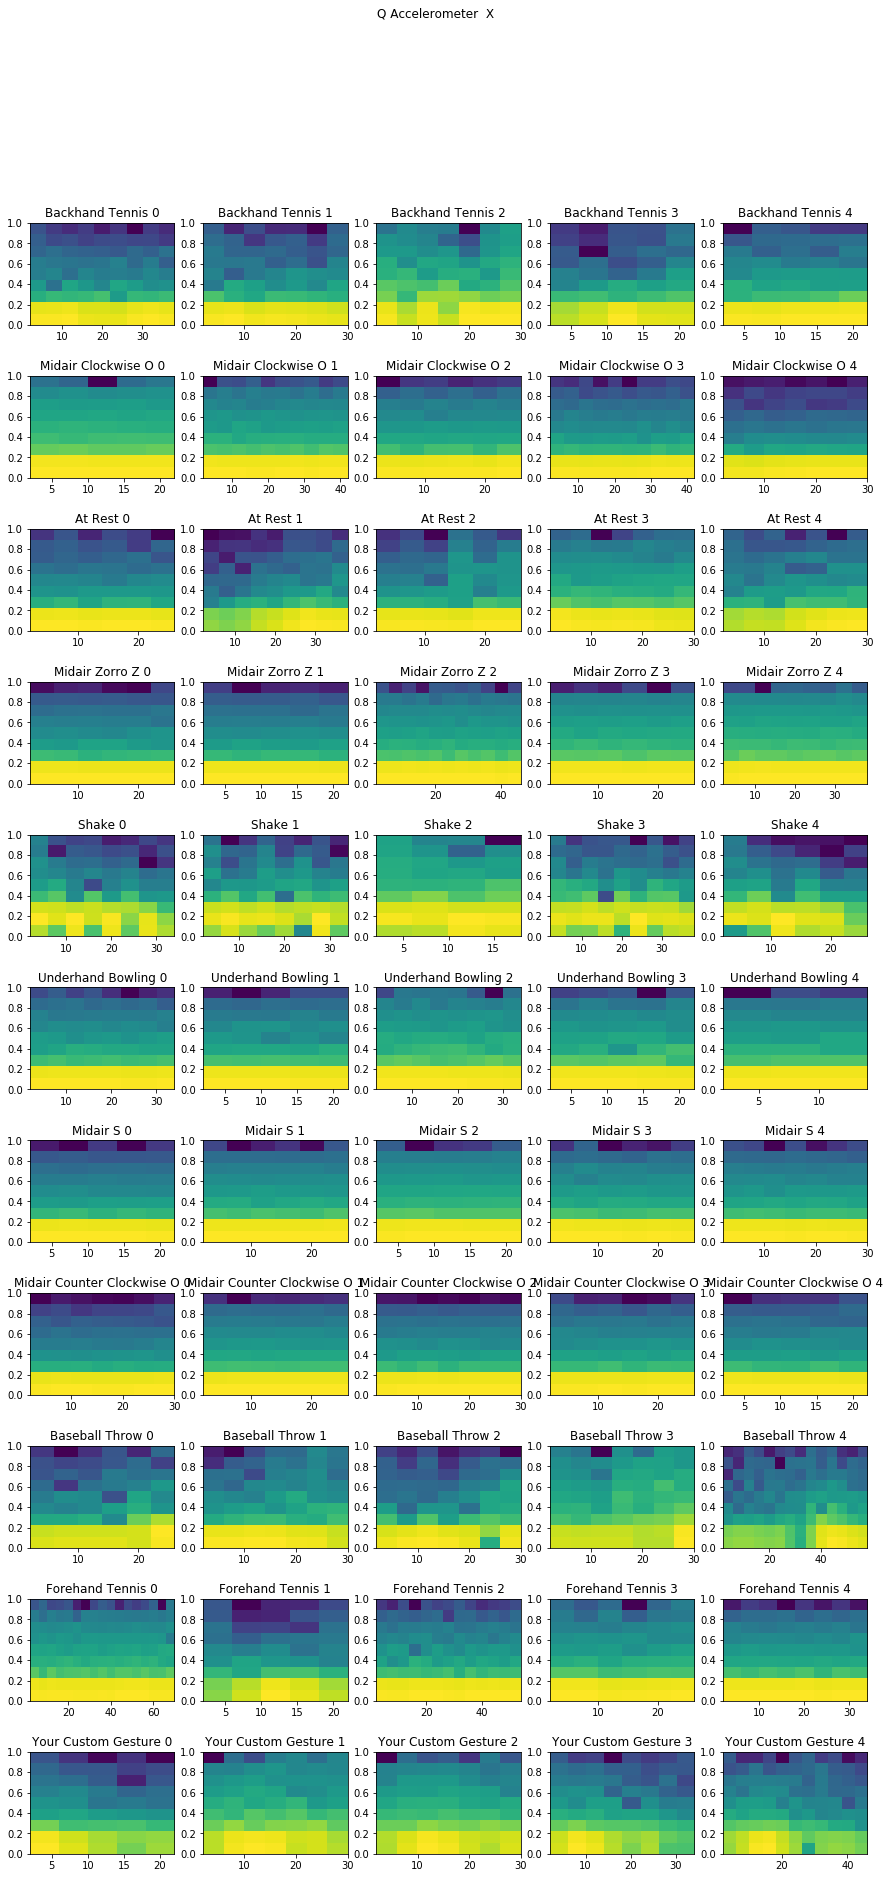

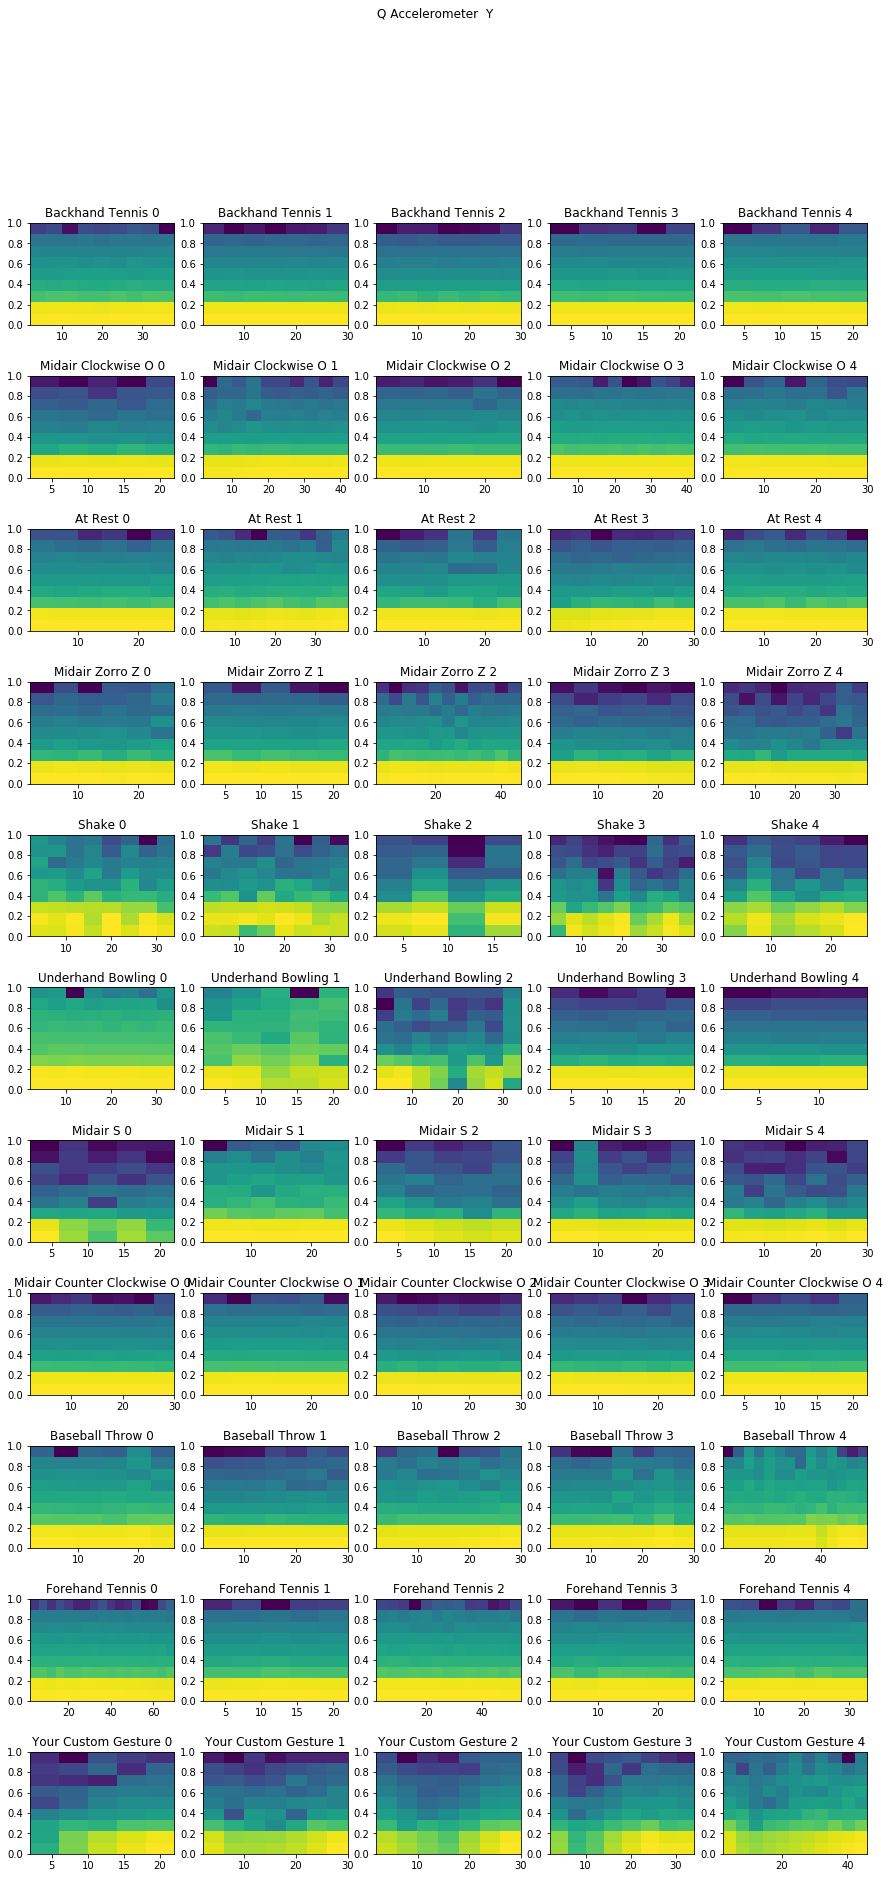

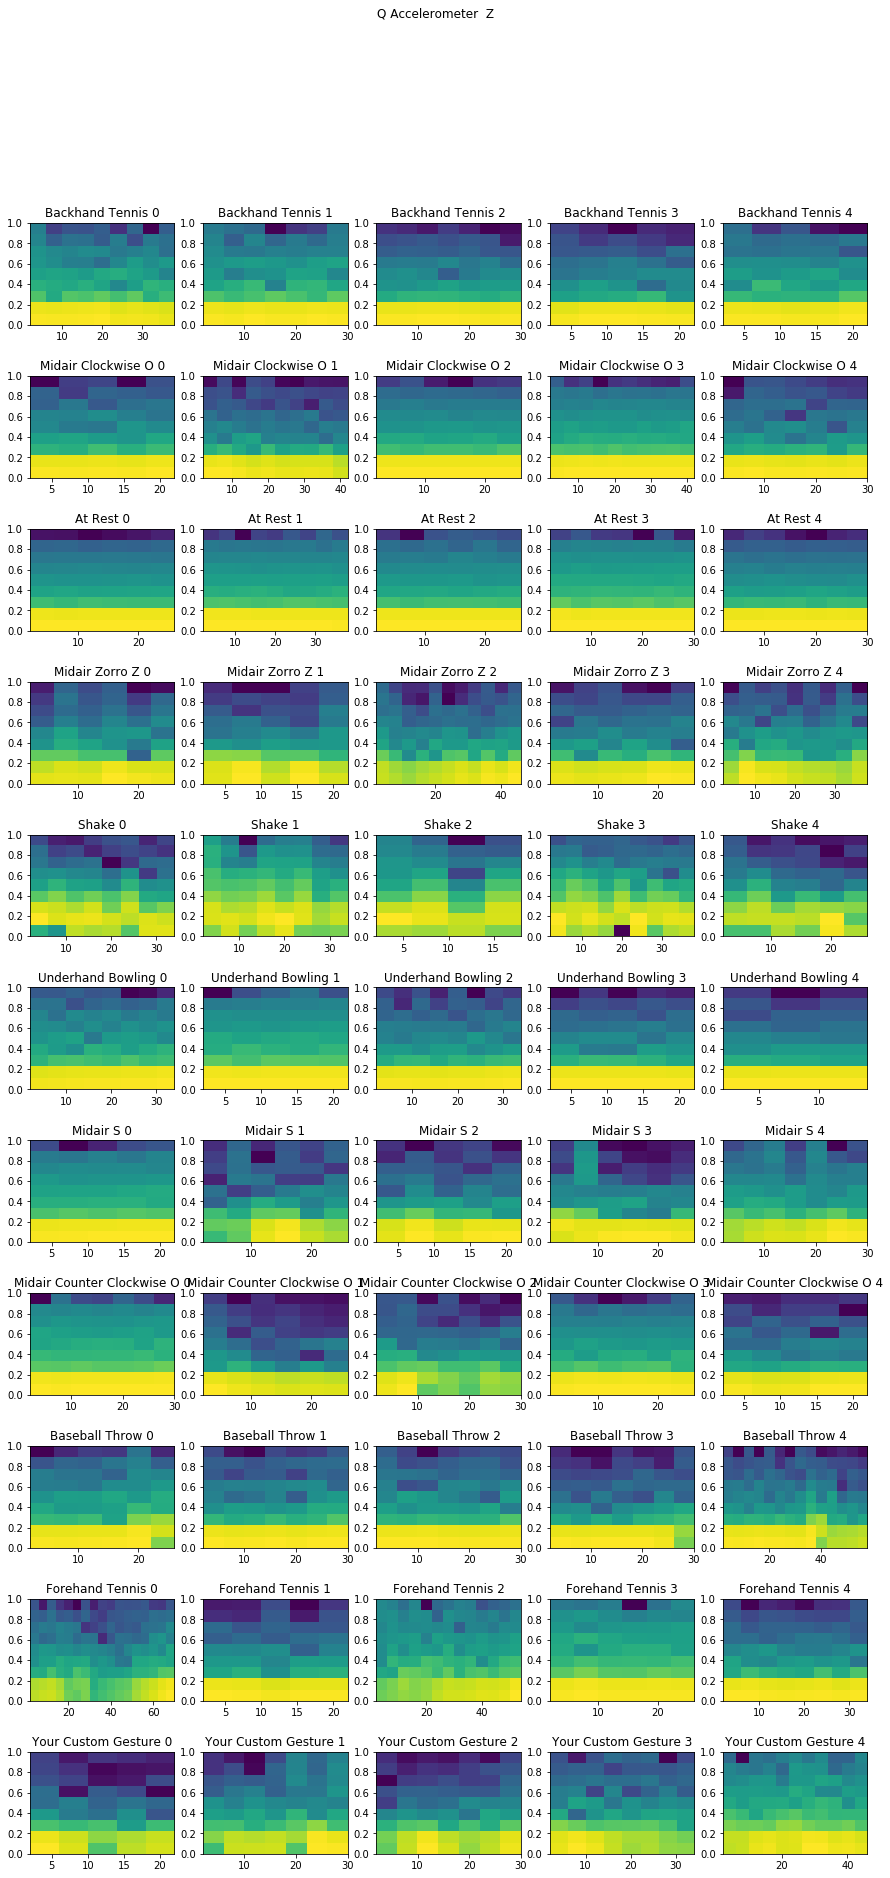

In [6]:
for dataset in ['J', 'Q']:
    for sensor in sensors:
        for col in xyz:
            spec(sensor, dataset, col)

In [7]:
def psd(sensor, dataset):
    fig, axs = plt.subplots(len(ids), 3, figsize = (10, 30))
    plt.subplots_adjust(hspace = 1, wspace = 1)
    fig.suptitle(dataset + ':' + sensor)
    for row in range(len(ids)):
        gesture = list(ids)[row]
        for col in range(len(xyz)):
            colname = xyz[col]
            for tid in range(len(ids[gesture])):
                mid = ids[gesture][tid]
                if (mid[0]!=dataset):
                    continue
                tdf = df.loc[(df['mId'] == mid) & (df['mSensor'] == sensor)]
                axs[row,col].psd(x = tdf[colname])
                axs[row,col].legend()
                axs[row,col].set_title(gesture + colname)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles wi

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles wi

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles wi

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles wi

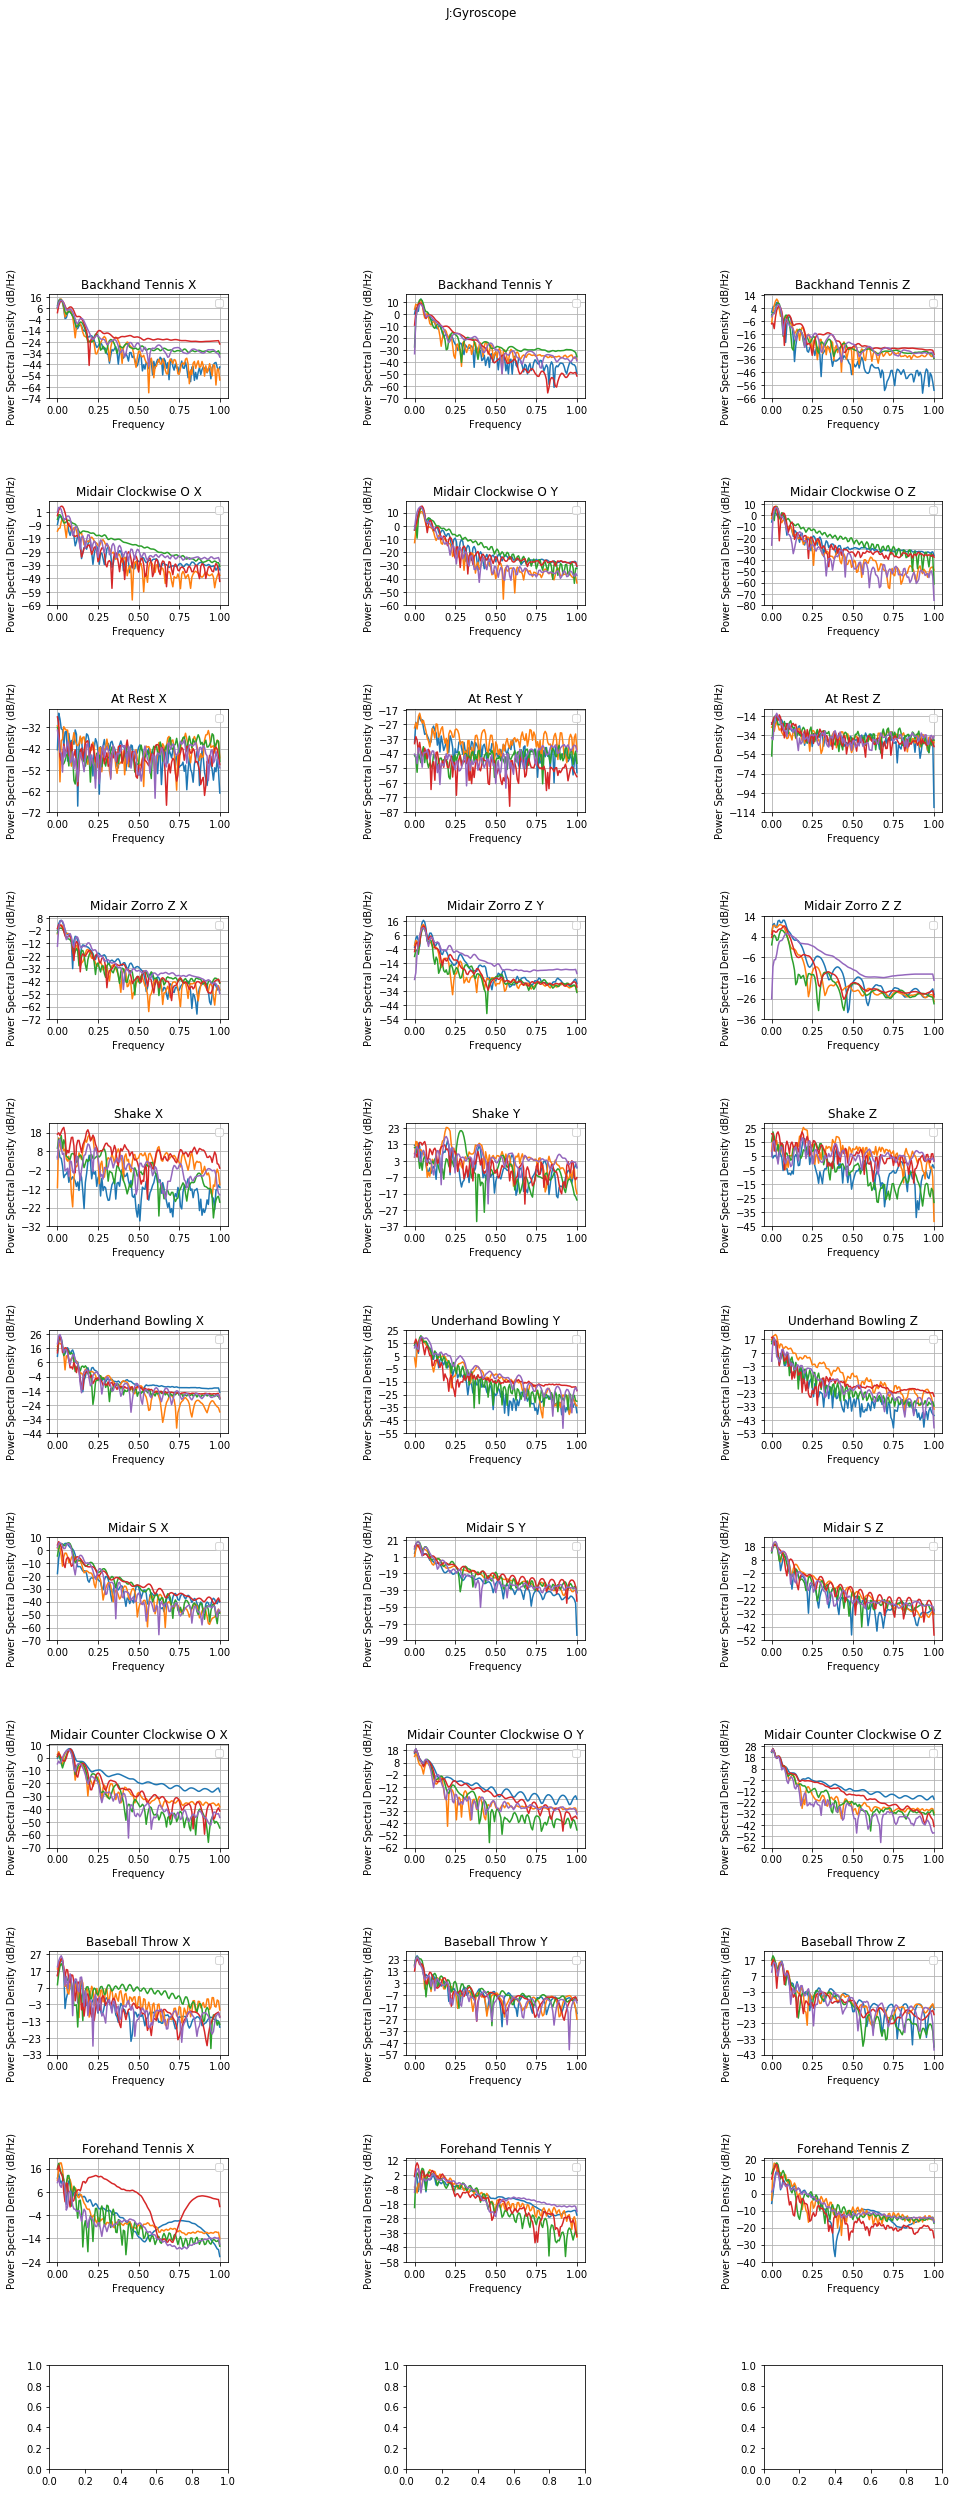

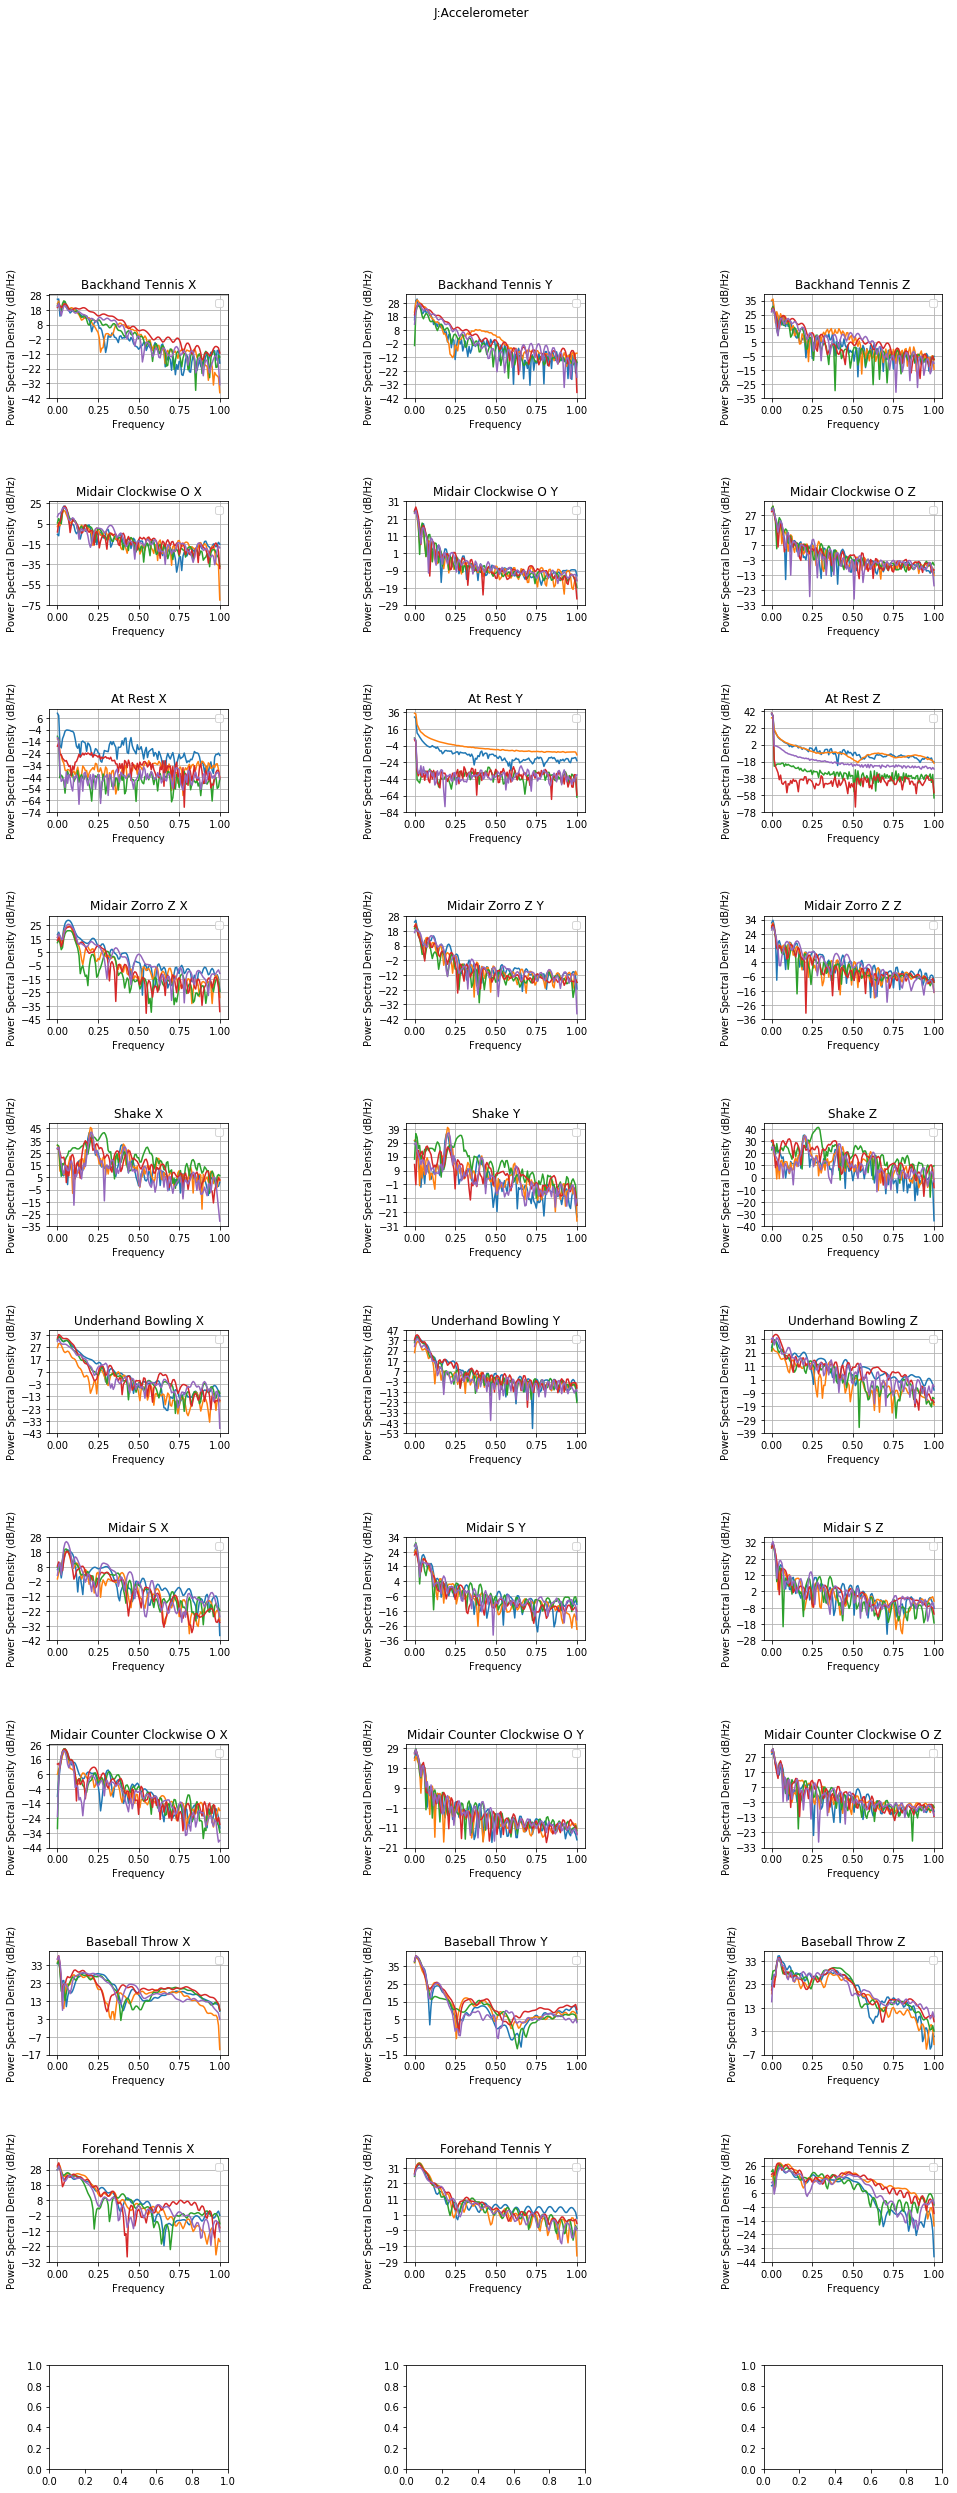

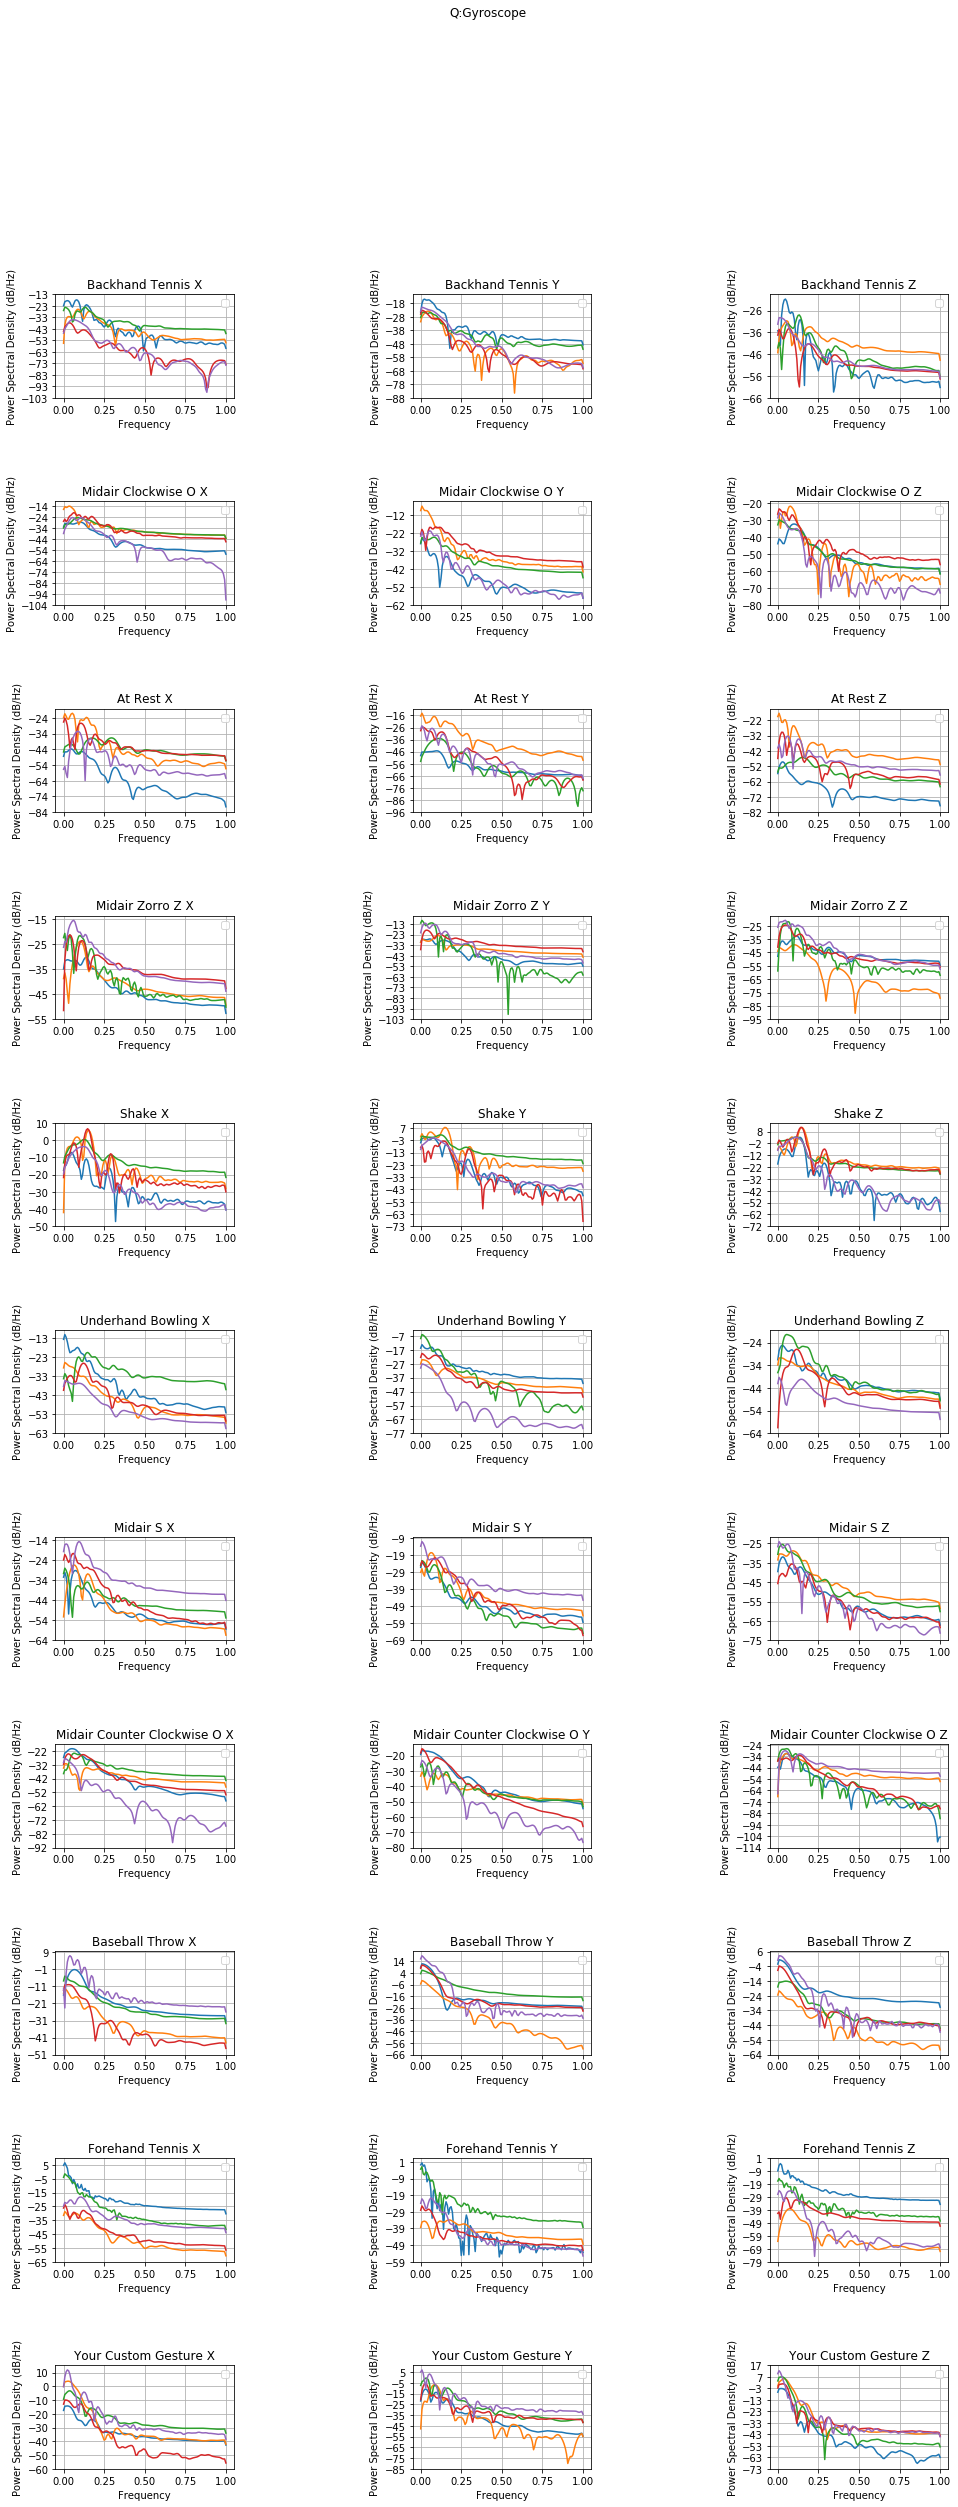

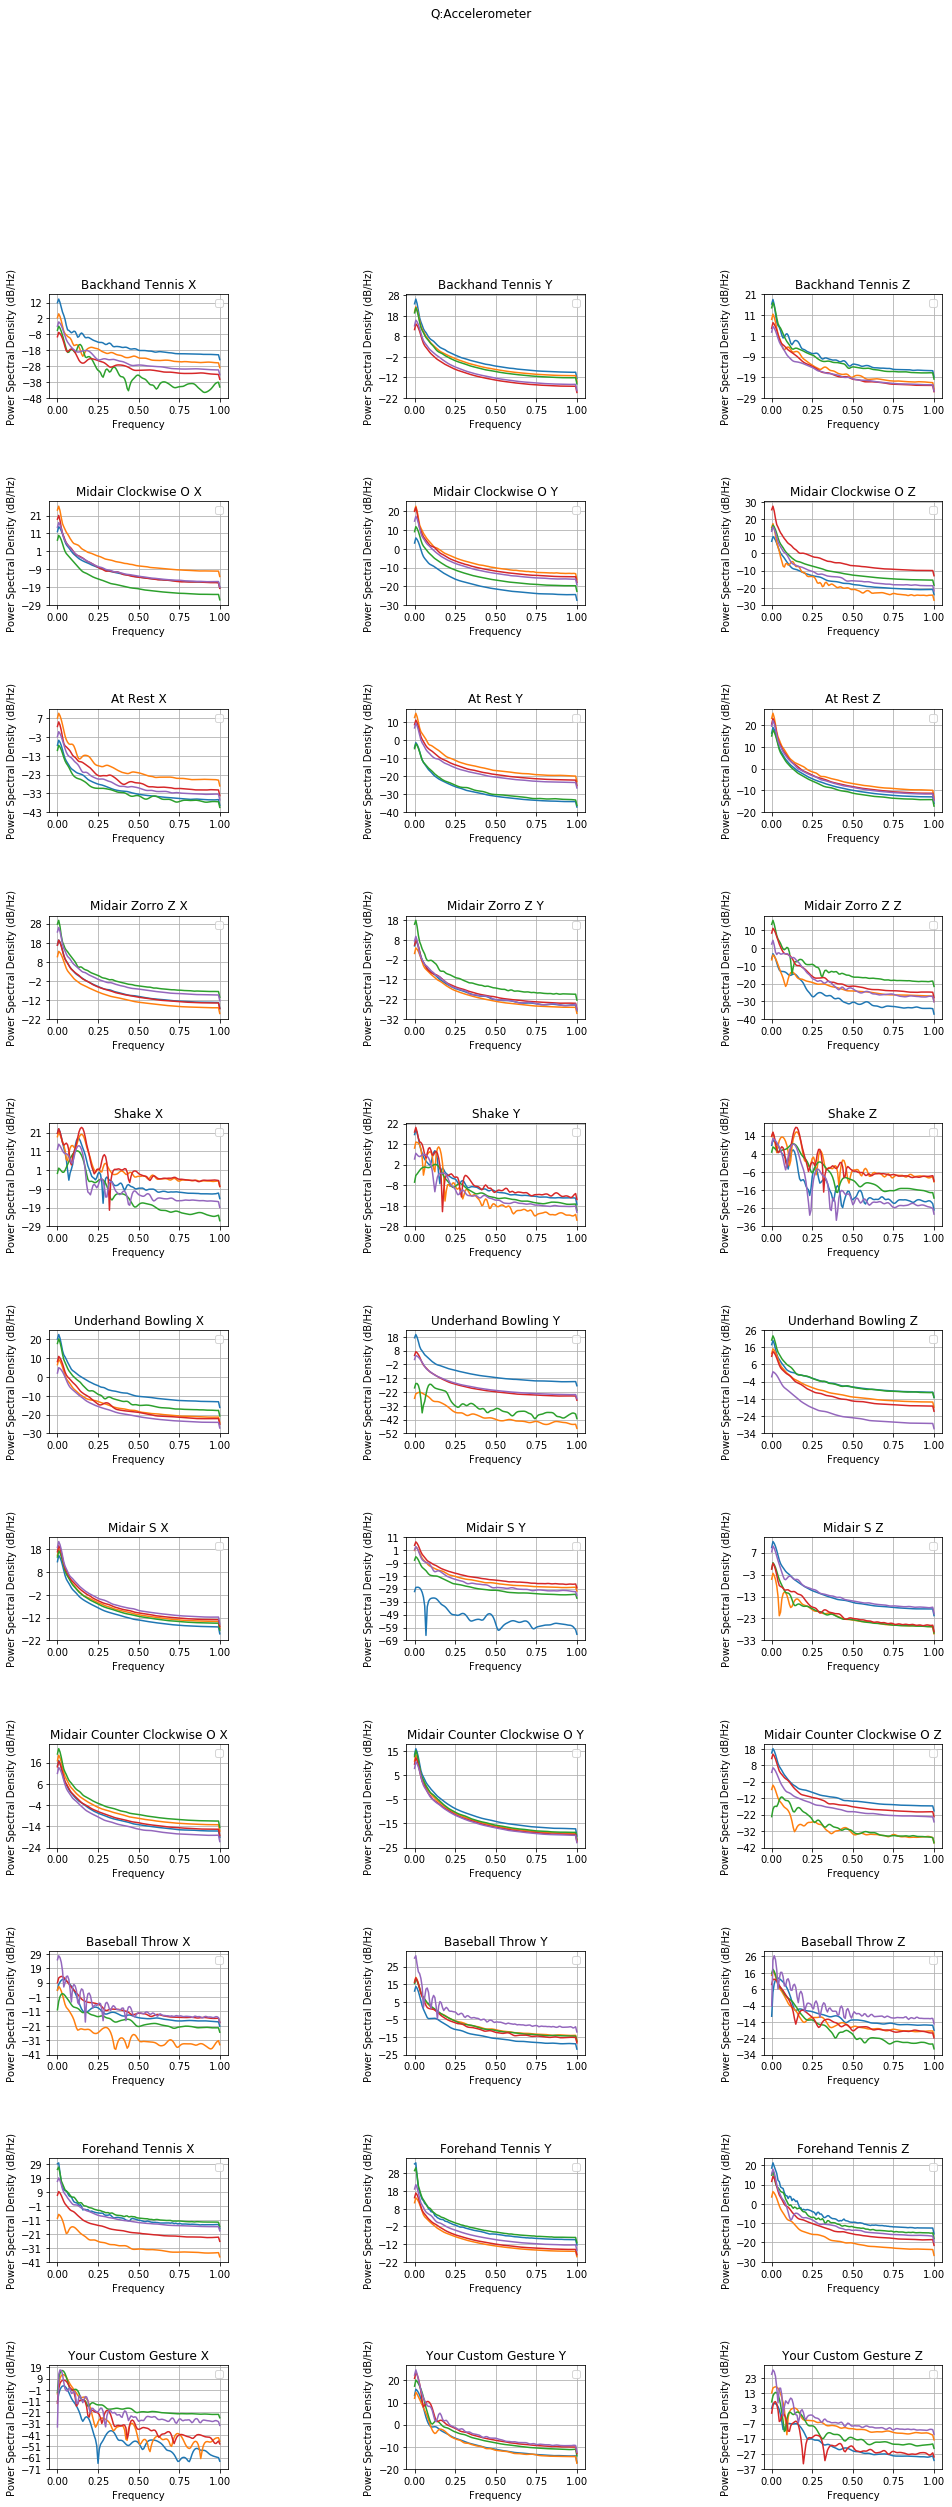

In [8]:
psd(sensors[0], 'J')
psd(sensors[1], 'J')
psd(sensors[0], 'Q')
psd(sensors[1], 'Q')

# Shape-Matching Recognition

In [9]:
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw
import operator
from scipy import stats

In [10]:
def ShapeMatchingRecognition(trains, tests, k):
    res = []
    for test in tests:
        dists = {}
        for train in trains:
            dist_v = []
            mid = train['mId'].unique()[0]
            for sensor in sensors:
                test_s = test.loc[test['mSensor'] == sensor]
                train_s = train.loc[train['mSensor'] == sensor]
                for col in xyz:
                    distance, path = fastdtw(train_s[col], test_s[col], dist=euclidean)
                    dist_v.append(distance)
            dists[mid] = np.linalg.norm(dist_v)
        sorted_dists = sorted(dists.items(), key=operator.itemgetter(1))
        sorted_keys = [i[0] for i in sorted_dists[:k]]
        candidates = [gestures[tid] for tid in sorted_keys]
        res.append(stats.mode(candidates)[0][0])
        print(' pred: '+stats.mode(candidates)[0][0] + ' *** ' + ', '.join(candidates))
    return res
            

# Model-based Recognition

In [11]:
from tsfresh import extract_features
import json
from sklearn.tree import DecisionTreeClassifier


In [21]:
def getFeatures(data):
    extracted_features = extract_features(data, column_id="mId", column_sort=" CurrentTimeMs", n_jobs=0)
    extracted_features=extracted_features.dropna(1)
    return extracted_features

def iniFeatures():
    data = df.loc[(df['mSensor'] == sensors[0]), [' CurrentTimeMs',' X', ' Y', ' Z', 'mId']]
    features = {}
    features['features'] = list(getFeatures(data))
    with open('features.json', 'w') as out_file:
        json.dump(features, out_file)   

def featuredData(data):
    data1 = data.loc[(data['mSensor'] == sensors[0]), [' CurrentTimeMs',' X', ' Y', ' Z', 'mId']]
    featured1 = extract_features(data1, column_id="mId", column_sort=" CurrentTimeMs", n_jobs=0)[features]
    data2 = data.loc[(data['mSensor'] == sensors[1]), [' CurrentTimeMs',' X', ' Y', ' Z', 'mId']]
    featured2 = extract_features(data2, column_id="mId", column_sort=" CurrentTimeMs", n_jobs=0)[features]
    featured = pd.concat([featured1, featured2], axis=1)
    return featured

# iniFeatures()

Feature Extraction: 100%|██████████| 315/315 [00:47<00:00,  7.36it/s]


In [22]:
with open('features.json', 'r') as in_file: 
    feature = json.load(in_file)
    features = feature['features']

# Evaluation

In [17]:
import random

def shuffle_kfold():
    jid = {}
    qid = {}
    for (gesture, mids) in ids.items():
        random.shuffle(mids)
        jid[gesture] = []
        qid[gesture] = []
        for mid in mids:
            if (mid[0] == 'J'):
                jid[gesture].append(mid)
            else:
                qid[gesture].append(mid)
    return (jid,qid)

def kfold_ids(dataset_ids, fold):
    test_ids = []
    train_ids = []
    for (gesture, mids) in dataset_ids.items():
        if (len(mids) == 0):
            continue
        test_ids.append(mids[fold])
        tids = mids.copy()
        del tids[fold]
        train_ids += tids
    return train_ids, test_ids

def kfold(dataset, m):
    overall_y = []
    overall_pred = []
    for i in range(5):
        print ('Fold %d :' % i)
        train_ids, test_ids = kfold_ids(dataset,i)
        if (m == 'shape'):
            # dtw
            train_data = [df.loc[df['mId'] == mid] for mid in train_ids]
            train_y = [data['mGesture'].unique()[0] for data in train_data]
            test_data = [df.loc[df['mId'] == mid] for mid in test_ids]
            test_y = [data['mGesture'].unique()[0] for data in test_data]
            print(" actual: %s" % ','.join(test_y))
            shape_matching_y = ShapeMatchingRecognition(train_data, test_data, 1)
            overall_pred += shape_matching_y
            overall_y += test_y
        else:
            # ts-fresh
            f_train_data = df.loc[df['mId'].isin(train_ids)]
            featured_train = featuredData(f_train_data)
            featured_train_y = np.array([gestures[mid] for mid in featured_train.index.values])
            f_test_data = df.loc[df['mId'].isin(test_ids)]
            featured_test = featuredData(f_test_data)
            featured_test_y = np.array([gestures[mid] for mid in featured_test.index.values])
            clf = DecisionTreeClassifier()
            clf.fit(featured_train,featured_train_y)
            overall_pred += list(clf.predict(featured_test))
            overall_y += list(featured_test_y)
#         break
    return overall_y, overall_pred


In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

def metric(y, pred_y):
    print("\nConfusion matrix: ")
    print(confusion_matrix(y, pred_y))
    print("\nAccuracy: "+str(accuracy_score(y, pred_y)))
    print("\nPer gesture accuracy: ")
    print(classification_report(y, pred_y, digits = 4))
    


In [25]:
dataset_ids = shuffle_kfold()
dataset_no = 0
for dids in dataset_ids:
    dataset_no += 1
    for m in ['shape','model']: 
        overall_y, overall_pred = kfold(dids, m)
        print('~~~ %d %s' % (dataset_no, m))
        metric(overall_y, overall_pred)

Fold 0 :
 actual: Backhand Tennis,Midair Clockwise O,At Rest,Midair Zorro Z,Shake,Underhand Bowling,Midair S,Midair Counter Clockwise O,Baseball Throw,Forehand Tennis,Your Custom Gesture


/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


 pred: Forehand Tennis *** Forehand Tennis
 pred: Midair Counter Clockwise O *** Midair Counter Clockwise O
 pred: At Rest *** At Rest
 pred: Midair S *** Midair S
 pred: Shake *** Shake
 pred: Underhand Bowling *** Underhand Bowling
 pred: Midair S *** Midair S
 pred: Midair Counter Clockwise O *** Midair Counter Clockwise O
 pred: Baseball Throw *** Baseball Throw
 pred: Midair Counter Clockwise O *** Midair Counter Clockwise O
 pred: Your Custom Gesture *** Your Custom Gesture
Fold 1 :
 actual: Backhand Tennis,Midair Clockwise O,At Rest,Midair Zorro Z,Shake,Underhand Bowling,Midair S,Midair Counter Clockwise O,Baseball Throw,Forehand Tennis,Your Custom Gesture
 pred: Backhand Tennis *** Backhand Tennis
 pred: Midair Zorro Z *** Midair Zorro Z
 pred: At Rest *** At Rest
 pred: Midair Zorro Z *** Midair Zorro Z
 pred: Shake *** Shake
 pred: Underhand Bowling *** Underhand Bowling
 pred: Midair Zorro Z *** Midair Zorro Z
 pred: Midair Counter Clockwise O *** Midair Counter Clockwise O


Feature Extraction:   1%|          | 1/132 [00:00<00:16,  8.04it/s]

 pred: Your Custom Gesture *** Your Custom Gesture
~~~ 1 shape

Confusion matrix: 
[[5 0 0 0 0 0 0 0 0 0 0]
 [0 3 0 2 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0 0 0]
 [0 2 0 2 0 1 0 0 0 0 0]
 [0 0 0 0 2 2 0 1 0 0 0]
 [0 0 0 0 1 4 0 0 0 0 0]
 [0 0 0 0 1 0 2 2 0 0 0]
 [0 0 0 0 1 0 2 2 0 0 0]
 [0 0 0 0 0 0 0 0 5 0 0]
 [0 0 0 0 0 0 0 0 0 5 0]
 [0 0 0 0 0 0 0 0 0 0 5]]

Accuracy: 0.7272727272727273

Per gesture accuracy: 
                            precision    recall  f1-score   support

                   At Rest     1.0000    1.0000    1.0000         5
           Backhand Tennis     0.6000    0.6000    0.6000         5
            Baseball Throw     1.0000    1.0000    1.0000         5
           Forehand Tennis     0.5000    0.4000    0.4444         5
        Midair Clockwise O     0.4000    0.4000    0.4000         5
Midair Counter Clockwise O     0.5714    0.8000    0.6667         5
                  Midair S     0.5000    0.4000    0.4444         5
            Midair Zorro Z     0.4000    0

Feature Extraction:   1%|          | 1/132 [00:00<00:15,  8.54it/s]

Fold 1 :


Feature Extraction:   1%|          | 1/132 [00:00<00:15,  8.59it/s]

Fold 2 :


Feature Extraction:   1%|          | 1/132 [00:00<00:19,  6.73it/s]

Fold 3 :


Feature Extraction:   1%|          | 1/132 [00:00<00:16,  8.01it/s]

Fold 4 :


Feature Extraction: 100%|██████████| 33/33 [00:04<00:00,  7.41it/s]


~~~ 1 model

Confusion matrix: 
[[4 1 0 0 0 0 0 0 0 0 0]
 [0 3 0 1 1 0 0 0 0 0 0]
 [0 1 4 0 0 0 0 0 0 0 0]
 [0 2 0 2 0 1 0 0 0 0 0]
 [0 1 0 0 1 2 0 1 0 0 0]
 [0 0 0 0 2 3 0 0 0 0 0]
 [1 0 0 0 1 0 2 1 0 0 0]
 [0 0 0 0 1 0 1 3 0 0 0]
 [0 0 0 0 0 0 0 0 5 0 0]
 [1 0 0 0 0 0 0 0 0 4 0]
 [1 1 1 0 0 0 0 0 0 0 2]]

Accuracy: 0.6

Per gesture accuracy: 
                            precision    recall  f1-score   support

                   At Rest     0.5714    0.8000    0.6667         5
           Backhand Tennis     0.3333    0.6000    0.4286         5
            Baseball Throw     0.8000    0.8000    0.8000         5
           Forehand Tennis     0.6667    0.4000    0.5000         5
        Midair Clockwise O     0.1667    0.2000    0.1818         5
Midair Counter Clockwise O     0.5000    0.6000    0.5455         5
                  Midair S     0.6667    0.4000    0.5000         5
            Midair Zorro Z     0.6000    0.6000    0.6000         5
                     Shake     1.0000   